#ELABORATO DEL CORSO DI MACHINE LEARNING & DATA MINING

##ANNO ACCADEMICO 23/24


*SABBADINI MARCO mat. 723421*

*SANTICOLI ROBERTO mat. 708955*

#SAN FRANCISCO CRIME CLASSIFICATION - [SFIDA KAGGLE](https://www.kaggle.com/competitions/sf-crime/overview)

# Importazione librerie

In [57]:
!pip install scikit-optimize

In [58]:
import numpy as np

# data processing
import pandas as pd

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style


from sklearn import linear_model
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import xgboost as xgb

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

# Libreria per supporto regex
import re

# Calendario festività USA
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

# Metriche
from sklearn.metrics import log_loss, accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score

# Model Selection & Hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from skopt import BayesSearchCV
from skopt.space  import Real, Categorical, Integer
import json

import math

# Collegamento con path Google Drive contenente i dataset

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
DATA_PATH_TRAIN = "/content/drive/MyDrive/Magistrale/MLDM/Elaborato/data/train.csv"
DATA_PATH_TEST = "/content/drive/MyDrive/Magistrale/MLDM/Elaborato/data/test.csv"

In [61]:
#DATA_PATH_TRAIN = "/content/drive/MyDrive/UNI/ELABORATO_MLDM/train.csv"
#DATA_PATH_TEST = "/content/drive/MyDrive/UNI/ELABORATO_MLDM/test.csv"

## Caricamento datasets

In [62]:
df_train = pd.read_csv(DATA_PATH_TRAIN)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [63]:
df_test = pd.read_csv(DATA_PATH_TEST)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          884262 non-null  int64  
 1   Dates       884262 non-null  object 
 2   DayOfWeek   884262 non-null  object 
 3   PdDistrict  884262 non-null  object 
 4   Address     884262 non-null  object 
 5   X           884262 non-null  float64
 6   Y           884262 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 47.2+ MB


# Data Exploration

In [64]:
df_train.head(10)

Dates        Category                        Descript  \
0  2015-05-13 23:53:00        WARRANTS                  WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES        TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES        TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT    GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT    GRAND THEFT FROM LOCKED AUTO   
5  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM UNLOCKED AUTO   
6  2015-05-13 23:30:00   VEHICLE THEFT               STOLEN AUTOMOBILE   
7  2015-05-13 23:30:00   VEHICLE THEFT               STOLEN AUTOMOBILE   
8  2015-05-13 23:00:00   LARCENY/THEFT    GRAND THEFT FROM LOCKED AUTO   
9  2015-05-13 23:00:00   LARCENY/THEFT    GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                        Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED             OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED             OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED      VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE       1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE      100 Block of BRODERICK ST   
5  Wednesday  INGLESIDE            NONE            0 Block of TEDDY AV   
6  Wednesday  INGLESIDE            NONE            AVALON AV / PERU AV   
7  Wednesday    BAYVIEW            NONE       KIRKWOOD AV / DONAHUE ST   
8  Wednesday   RICHMOND            NONE           600 Block of 47TH AV   
9  Wednesday    CENTRAL            NONE  JEFFERSON ST / LEAVENWORTH ST   

            X          Y  
0 -122.425892  37.774599  
1 -122.425892  37.774599  
2 -122.424363  37.800414  
3 -122.426995  37.800873  
4 -122.438738  37.771541  
5 -122.403252  37.713431  
6 -122.423327  37.725138  
7 -122.371274  37.727564  
8 -122.508194  37.776601  
9 -122.419088  37.807802

In [65]:
df_train.tail(10)

Dates                Category  \
878039  2003-01-06 00:40:00          OTHER OFFENSES   
878040  2003-01-06 00:33:00                 ASSAULT   
878041  2003-01-06 00:31:00          OTHER OFFENSES   
878042  2003-01-06 00:20:00                 ASSAULT   
878043  2003-01-06 00:20:00          OTHER OFFENSES   
878044  2003-01-06 00:15:00                 ROBBERY   
878045  2003-01-06 00:01:00           LARCENY/THEFT   
878046  2003-01-06 00:01:00           LARCENY/THEFT   
878047  2003-01-06 00:01:00               VANDALISM   
878048  2003-01-06 00:01:00  FORGERY/COUNTERFEITING   

                                         Descript DayOfWeek PdDistrict  \
878039      DRIVERS LICENSE, SUSPENDED OR REVOKED    Monday   NORTHERN   
878040                INFLICT INJURY ON COHABITEE    Monday    MISSION   
878041      DRIVERS LICENSE, SUSPENDED OR REVOKED    Monday   RICHMOND   
878042              ATTEMPTED HOMICIDE WITH A GUN    Monday    BAYVIEW   
878043                           PAROLE VIOLATION    Monday    BAYVIEW   
878044           ROBBERY ON THE STREET WITH A GUN    Monday    TARAVAL   
878045               GRAND THEFT FROM LOCKED AUTO    Monday  INGLESIDE   
878046               GRAND THEFT FROM LOCKED AUTO    Monday   SOUTHERN   
878047  MALICIOUS MISCHIEF, VANDALISM OF VEHICLES    Monday   SOUTHERN   
878048                   CHECKS, FORGERY (FELONY)    Monday    BAYVIEW   

            Resolution                     Address           X          Y  
878039   ARREST, CITED     POLK ST / CALIFORNIA ST -122.420692  37.790577  
878040            NONE     2800 Block of FOLSOM ST -122.414073  37.751685  
878041   ARREST, CITED        CLEMENT ST / 14TH AV -122.472985  37.782552  
878042  ARREST, BOOKED    1500 Block of SHAFTER AV -122.389769  37.730564  
878043  ARREST, BOOKED    1500 Block of SHAFTER AV -122.389769  37.730564  
878044            NONE  FARALLONES ST / CAPITOL AV -122.459033  37.714056  
878045            NONE        600 Block of EDNA ST -122.447364  37.731948  
878046            NONE          5TH ST / FOLSOM ST -122.403390  37.780266  
878047            NONE        TOWNSEND ST / 2ND ST -122.390531  37.780607  
878048            NONE    1800 Block of NEWCOMB AV -122.394926  37.738212

# Pulizia del dataset

Con l'`info()` si evidenziano:

*   878049/878049 records con valori non-null;
*   8 features;
*   1 classe da predirre -> **category**.



In [66]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [67]:
df_train.shape

(878049, 9)

In [68]:
df_train['Category'].value_counts()

Category
LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQ

<Axes: ylabel='Category'>

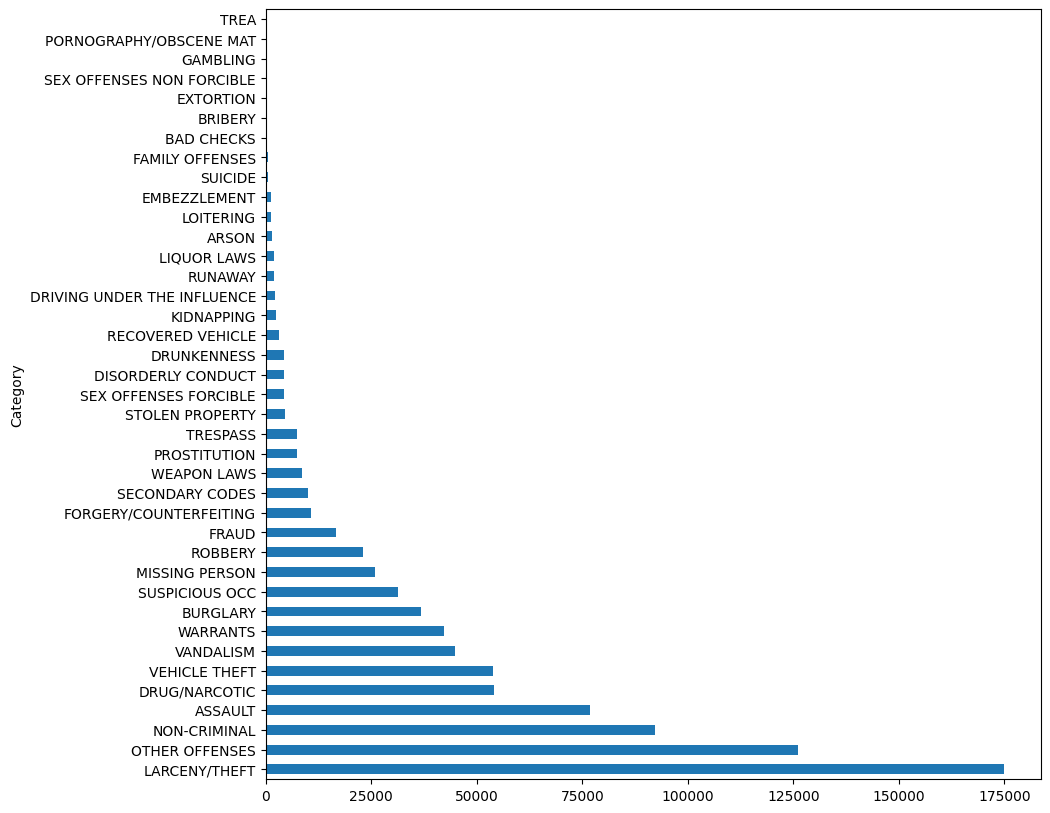

In [69]:
df_sorted = df_train.sort_values('Category', ascending=True)
df_sorted['Category'].value_counts().plot.barh(figsize=(10,10))

In [70]:
df_train['PdDistrict'].value_counts()

PdDistrict
SOUTHERN      157182
MISSION       119908
NORTHERN      105296
BAYVIEW        89431
CENTRAL        85460
TENDERLOIN     81809
INGLESIDE      78845
TARAVAL        65596
PARK           49313
RICHMOND       45209
Name: count, dtype: int64

<Axes: ylabel='PdDistrict'>

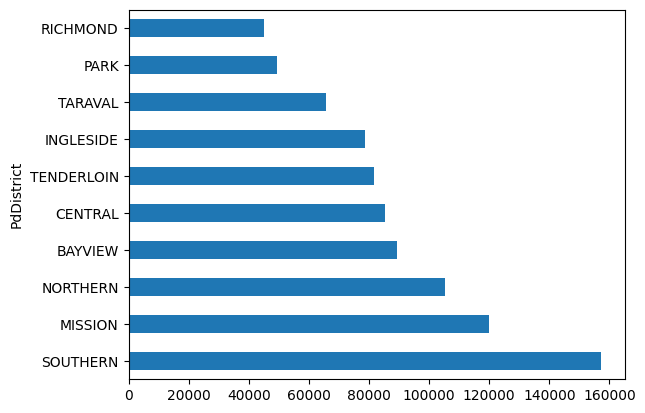

In [71]:
df_train['PdDistrict'].value_counts().plot.barh()

In [72]:
df_train[['X', 'Y']].nunique()

X    34243
Y    34243
dtype: int64

In [73]:
df_train[['X','Y']].describe()

X              Y
count  878049.000000  878049.000000
mean     -122.422616      37.771020
std         0.030354       0.456893
min      -122.513642      37.707879
25%      -122.432952      37.752427
50%      -122.416420      37.775421
75%      -122.406959      37.784369
max      -120.500000      90.000000

In [74]:
df_train[df_train['X'] == df_train['X'].max()]

Dates               Category  \
660485  2005-12-30 17:00:00          LARCENY/THEFT   
660711  2005-12-30 00:34:00                ASSAULT   
660712  2005-12-30 00:34:00                ASSAULT   
661106  2005-12-29 00:07:00           NON-CRIMINAL   
666430  2005-11-30 11:25:00         OTHER OFFENSES   
...                     ...                    ...   
844995  2003-06-11 08:49:00         OTHER OFFENSES   
845842  2003-06-09 09:25:00         OTHER OFFENSES   
852880  2003-05-02 01:00:00  SEX OFFENSES FORCIBLE   
857248  2003-04-14 16:30:00                ROBBERY   
871198  2003-02-05 12:00:00          LARCENY/THEFT   

                                     Descript  DayOfWeek  PdDistrict  \
660485           GRAND THEFT FROM LOCKED AUTO     Friday  TENDERLOIN   
660711            INFLICT INJURY ON COHABITEE     Friday     BAYVIEW   
660712   AGGRAVATED ASSAULT WITH BODILY FORCE     Friday     BAYVIEW   
661106           AIDED CASE, MENTAL DISTURBED   Thursday  TENDERLOIN   
666430                      TRAFFIC VIOLATION  Wednesday  TENDERLOIN   
...                                       ...        ...         ...   
844995  DRIVERS LICENSE, SUSPENDED OR REVOKED  Wednesday   INGLESIDE   
845842  DRIVERS LICENSE, SUSPENDED OR REVOKED     Monday   INGLESIDE   
852880            FORCIBLE RAPE, BODILY FORCE     Friday    SOUTHERN   
857248       ROBBERY ON THE STREET, STRONGARM     Monday     BAYVIEW   
871198           PETTY THEFT FROM LOCKED AUTO  Wednesday    SOUTHERN   

                              Resolution  \
660485                              NONE   
660711                    ARREST, BOOKED   
660712                    ARREST, BOOKED   
661106                 PSYCHOPATHIC CASE   
666430                     ARREST, CITED   
...                                  ...   
844995                     ARREST, CITED   
845842                     ARREST, CITED   
852880  COMPLAINANT REFUSES TO PROSECUTE   
857248  COMPLAINANT REFUSES TO PROSECUTE   
871198                              NONE   

                                        Address      X     Y  
660485              5THSTNORTH ST / OFARRELL ST -120.5  90.0  
660711          JAMESLICKFREEWAY HY / SILVER AV -120.5  90.0  
660712          JAMESLICKFREEWAY HY / SILVER AV -120.5  90.0  
661106                  5THSTNORTH ST / EDDY ST -120.5  90.0  
666430                 5THSTNORTH ST / ELLIS ST -120.5  90.0  
...                                         ...    ...   ...  
844995  JAMES LICK FREEWAY HY / CESAR CHAVEZ ST -120.5  90.0  
845842  JAMES LICK FREEWAY HY / CESAR CHAVEZ ST -120.5  90.0  
852880           3RD ST / JAMES LICK FREEWAY HY -120.5  90.0  
857248                     GILMAN AV / FITCH ST -120.5  90.0  
871198      SPEAR ST / THE EMBARCADERO SOUTH ST -120.5  90.0  

[67 rows x 9 columns]

In [75]:
df_train[df_train['X'] == df_train['X'].min()]

Dates       Category                      Descript  \
795899  2004-02-07 12:00:00  LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
835783  2003-07-25 11:30:00        ASSAULT                       BATTERY   

       DayOfWeek PdDistrict Resolution                      Address  \
795899  Saturday   RICHMOND       NONE  900 Block of POINT LOBOS AV   
835783    Friday   RICHMOND       NONE  900 Block of POINT LOBOS AV   

                 X          Y  
795899 -122.513642  37.778469  
835783 -122.513642  37.778469

In [76]:
df_test[df_test['X'] == df_test['X'].max()]

Id                Dates DayOfWeek  PdDistrict  \
664733  664733  2005-12-20 14:57:00   Tuesday  TENDERLOIN   
664734  664734  2005-12-20 14:57:00   Tuesday  TENDERLOIN   
664826  664826  2005-12-20 07:36:00   Tuesday    RICHMOND   
664895  664895  2005-12-19 23:08:00    Monday  TENDERLOIN   
667226  667226  2005-12-06 09:40:00   Tuesday    RICHMOND   
...        ...                  ...       ...         ...   
830647  830647  2003-09-12 23:00:00    Friday    NORTHERN   
830648  830648  2003-09-12 23:00:00    Friday    NORTHERN   
836254  836254  2003-08-16 17:30:00  Saturday    SOUTHERN   
836255  836255  2003-08-16 17:30:00  Saturday    SOUTHERN   
861864  861864  2003-04-12 11:30:00  Saturday     TARAVAL   

                                          Address      X     Y  
664733              7THSTNORTH ST / MCALLISTER ST -120.5  90.0  
664734              7THSTNORTH ST / MCALLISTER ST -120.5  90.0  
664826             GEARY BL / AVENUE OF THE PALMS -120.5  90.0  
664895                    EDDY ST / 5THSTNORTH ST -120.5  90.0  
667226             GEARY BL / AVENUE OF THE PALMS -120.5  90.0  
...                                           ...    ...   ...  
830647                      AUSTIN ST / LARKIN ST -120.5  90.0  
830648                      AUSTIN ST / LARKIN ST -120.5  90.0  
836254        SPEAR ST / THE EMBARCADERO SOUTH ST -120.5  90.0  
836255        SPEAR ST / THE EMBARCADERO SOUTH ST -120.5  90.0  
861864  LOWER GREAT HY / MARTIN LUTHER KING JR DR -120.5  90.0  

[76 rows x 7 columns]


## SOSTITUZIONE DEGLI OUTLIERS DELLE COORDINATE CON IL VALORE MEDIO CALCOLATO SUI RESTANTI VALORI CORRETTI

Andiamo a sostituire i valori errati con i valor medio delle coordinate x e y corrette in modo tale da avere una visualizzazione più omogenea dei dati relativi alla posizione.
Dalle colonne X e Y estraiamo 2 colonne senza i valori massimi e minimi.
Abbiamo scelto di utilizzare il valore medio poichè il numero di outliers risulta infinitesimale rispetto alla cardinalità del dataset.

In [77]:
x_column = df_train['X']
x_filtered_col = x_column[(x_column != x_column.max())]

Xavg=x_filtered_col.mean()
print(Xavg)

-122.42276317251697


In [78]:
x_column_test = df_test['X']
x_filtered_col_test = x_column_test[(x_column_test != x_column_test.max())]

Xavg_test = x_filtered_col_test.mean()
print(Xavg_test)

-122.42285845633067


In [79]:
y_column = df_train['Y']
y_filtered_col = y_column[(y_column != y_column.max())]

Yavg=y_filtered_col.mean()

print(Yavg)

37.76703463356764


In [80]:
y_column_test = df_test['Y']
y_filtered_col_test = y_column_test[(y_column_test != y_column_test.max())]

Yavg_test = y_filtered_col_test.mean()

print(Yavg_test)

37.766986454039525


In [81]:
df_train['Y'].replace(to_replace=df_train['Y'].max(), value=Yavg, inplace=True)
df_train['X'].replace(to_replace=df_train['X'].max(), value=Xavg, inplace=True)

In [82]:
df_test['Y'].replace(to_replace=df_test['Y'].max(), value=Yavg_test, inplace=True)
df_test['X'].replace(to_replace=df_test['X'].max(), value=Xavg_test, inplace=True)

In [83]:
df_train[['X', 'Y']].describe()

X              Y
count  878049.000000  878049.000000
mean     -122.422763      37.767035
std         0.025284       0.024164
min      -122.513642      37.707879
25%      -122.432952      37.752427
50%      -122.416422      37.775421
75%      -122.406959      37.784368
max      -122.364937      37.819975

In [84]:
df_test[['X', 'Y']].describe()

X              Y
count  884262.000000  884262.000000
mean     -122.422858      37.766986
std         0.025344       0.024178
min      -122.513642      37.707879
25%      -122.433069      37.752374
50%      -122.416517      37.775421
75%      -122.406959      37.784353
max      -122.364751      37.820621

<Axes: xlabel='X', ylabel='Y'>

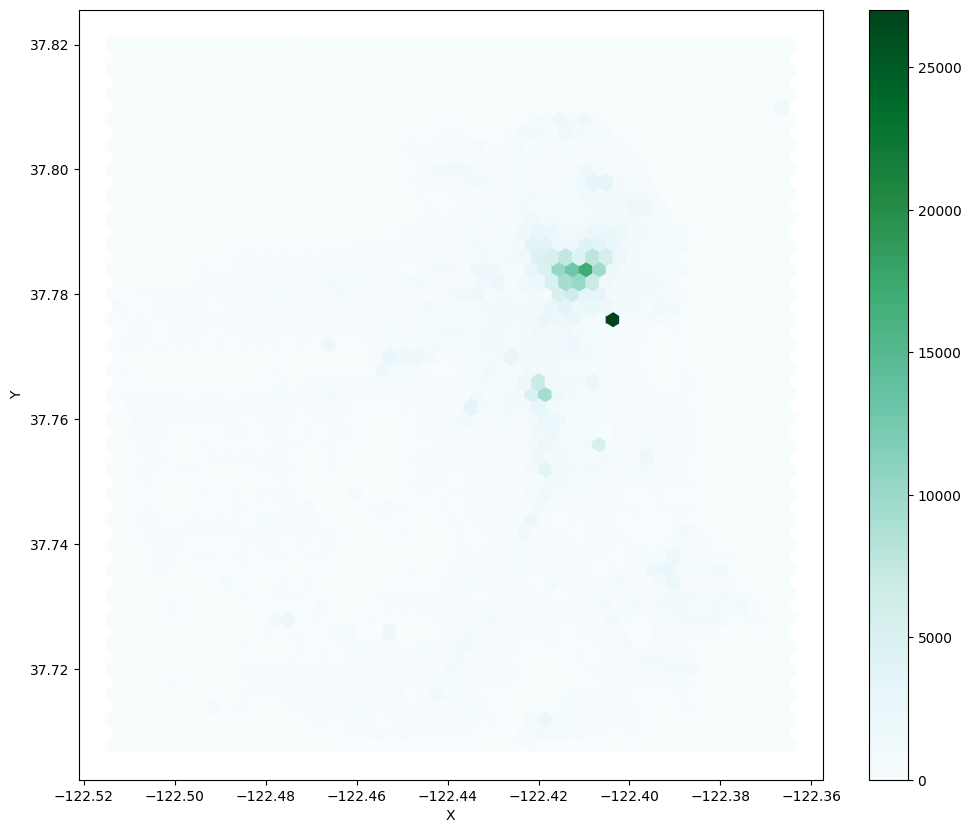

In [85]:
df_train.plot.hexbin(x='X', y='Y', figsize=(12, 10), gridsize=50)

<Axes: ylabel='DayOfWeek'>

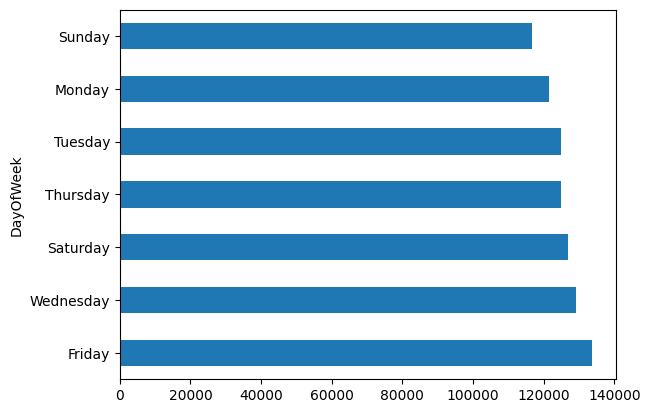

In [86]:
df_train['DayOfWeek'].value_counts().plot.barh()

<Axes: ylabel='Resolution'>

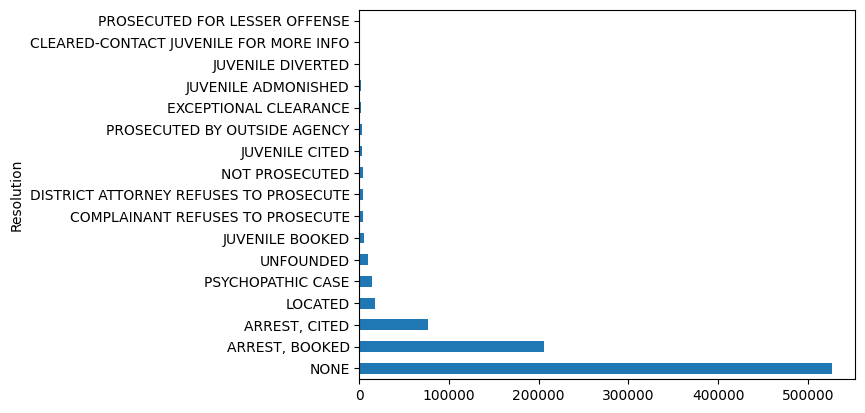

In [87]:
df_train['Resolution'].value_counts().plot.barh()

#Feature engineering

# Creazione di nuove features
Utilizziamo [pandas](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) per estrarre le *Time features* dalla feature *Dates*:


1.   Year
2.   Month

1.   Day
2.   Hour

1.   Minutes









In [88]:
df_train['Dates']= pd.to_datetime(df_train['Dates'], format='%Y-%m-%d %H:%M:%S')
df_test['Dates']= pd.to_datetime(df_test['Dates'], format='%Y-%m-%d %H:%M:%S')

Aggiunta feature *Minutes*

N.B. `lambda x: x.minute` è una funzione anonima in Python, che accetta un argomento x e restituisce il valore dei minuti dell'oggetto x, **assumendo che x sia un oggetto datetime**.

In [89]:
df_train['Minute'] = df_train['Dates'].map(lambda x: x.minute)
df_test['Minute'] = df_test['Dates'].map(lambda x: x.minute)

Aggiunta feature *Hour*

In [90]:
df_train['Hour'] = df_train['Dates'].map(lambda x : x.hour)
df_test['Hour'] = df_test['Dates'].map(lambda x : x.hour)

Aggiunta feature *Day*

In [91]:
df_train['Day'] = df_train['Dates'].map(lambda x: x.day)
df_test['Day'] = df_test['Dates'].map(lambda x: x.day)

Aggiunta feature *Month*

In [92]:
df_train['Month'] = df_train['Dates'].map(lambda x: x.month)
df_test['Month'] = df_test['Dates'].map(lambda x: x.month)

Aggiunta feature *Year*

In [93]:
df_train['Year'] = df_train['Dates'].map(lambda x : x.year)
df_test['Year'] = df_test['Dates'].map(lambda x : x.year)

In [94]:
df_train.head()

Dates        Category                      Descript  \
0 2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1 2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2 2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  Minute  Hour  Day  Month  Year  
0 -122.425892  37.774599      53    23   13      5  2015  
1 -122.425892  37.774599      53    23   13      5  2015  
2 -122.424363  37.800414      33    23   13      5  2015  
3 -122.426995  37.800873      30    23   13      5  2015  
4 -122.438738  37.771541      30    23   13      5  2015

In [95]:
df_test.head()

Id               Dates DayOfWeek PdDistrict                   Address  \
0   0 2015-05-10 23:59:00    Sunday    BAYVIEW   2000 Block of THOMAS AV   
1   1 2015-05-10 23:51:00    Sunday    BAYVIEW        3RD ST / REVERE AV   
2   2 2015-05-10 23:50:00    Sunday   NORTHERN    2000 Block of GOUGH ST   
3   3 2015-05-10 23:45:00    Sunday  INGLESIDE  4700 Block of MISSION ST   
4   4 2015-05-10 23:45:00    Sunday  INGLESIDE  4700 Block of MISSION ST   

            X          Y  Minute  Hour  Day  Month  Year  
0 -122.399588  37.735051      59    23   10      5  2015  
1 -122.391523  37.732432      51    23   10      5  2015  
2 -122.426002  37.792212      50    23   10      5  2015  
3 -122.437394  37.721412      45    23   10      5  2015  
4 -122.437394  37.721412      45    23   10      5  2015

# Strada più pericolosa di San Francisco ❌

Vediamo quali sono le strade più e meno sicure di San Francisco.

In [96]:
crimes_by_street = df_train.groupby('Address').size()

# Trovare la strada con il maggior numero di crimini
most_dangerous_street = crimes_by_street.idxmax()
max_crimes = crimes_by_street.max()

# Trovare la strada con il minor numero di crimini
less_dangerous_street = crimes_by_street.idxmin()
min_crimes = crimes_by_street.min()

print(f"La strada con il maggior numero di crimini è '{most_dangerous_street}' con {max_crimes} crimini.")
print(f"La strada con il minor numero di crimini è '{less_dangerous_street}' con {min_crimes} crimini.")

La strada con il maggior numero di crimini è '800 Block of BRYANT ST' con 26533 crimini.
La strada con il minor numero di crimini è '0 Block of  HARRISON ST' con 1 crimini.


# Spatial features
Il tipo di strada potrebbe avere un signficato per numero e tipo di crimini commessi?

In [97]:
df_train['Address'].value_counts().index #indirizzi ordinati in base al numero dei crimini

Index(['800 Block of BRYANT ST', '800 Block of MARKET ST',
       '2000 Block of MISSION ST', '1000 Block of POTRERO AV',
       '900 Block of MARKET ST', '0 Block of TURK ST', '0 Block of 6TH ST',
       '300 Block of ELLIS ST', '400 Block of ELLIS ST',
       '16TH ST / MISSION ST',
       ...
       '5TH AV / CALIFORNIA ST', 'HAZELWOOD AV / YERBABUENA AV',
       '0 Block of TROY AL', '900 Block of MARTIN LUTHER KING JR DR',
       'CLIPPER ST / PORTOLA DR', 'PRECITA AV / CESAR CHAVEZ ST',
       '0 Block of COLUSA PL', '2800 Block of KEITH ST',
       'CABRILLO ST / ARGUELLO BL', 'OFARRELL ST / CYRIL MAGNIN ST'],
      dtype='object', name='Address', length=23228)

Aggiunta della feature *street_types* per andare a categorizzare le strade sulla base della loro tipologia

In [98]:
def find_streets(address):
    street_types = ['AV', 'ST', 'CT', 'PZ', 'LN', 'DR', 'PL', 'HY',
                    'FY', 'WY', 'TR', 'RD', 'BL', 'WAY', 'CR', 'AL', 'I-80',
                    'RW', 'WK','EL CAMINO DEL MAR']
    street_pattern = '|'.join(street_types)
    streets = re.findall(street_pattern, address)
    if len(streets) == 0:
        return 'OTHER'
    elif len(streets) == 1: #trovata corrispondenza-> restituisco il tipo di strada
        return streets[0]
    else:
        return 'INT' #intersezione

df_train['StreetType'] = df_train['Address'].map(find_streets)
df_test['StreetType'] = df_test['Address'].map(find_streets)

In [99]:
df_train.head()

Dates        Category                      Descript  \
0 2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1 2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2 2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  Minute  Hour  Day  Month  Year StreetType  
0 -122.425892  37.774599      53    23   13      5  2015        INT  
1 -122.425892  37.774599      53    23   13      5  2015        INT  
2 -122.424363  37.800414      33    23   13      5  2015        INT  
3 -122.426995  37.800873      30    23   13      5  2015        INT  
4 -122.438738  37.771541      30    23   13      5  2015         ST

In [100]:
df_test.head()

Id               Dates DayOfWeek PdDistrict                   Address  \
0   0 2015-05-10 23:59:00    Sunday    BAYVIEW   2000 Block of THOMAS AV   
1   1 2015-05-10 23:51:00    Sunday    BAYVIEW        3RD ST / REVERE AV   
2   2 2015-05-10 23:50:00    Sunday   NORTHERN    2000 Block of GOUGH ST   
3   3 2015-05-10 23:45:00    Sunday  INGLESIDE  4700 Block of MISSION ST   
4   4 2015-05-10 23:45:00    Sunday  INGLESIDE  4700 Block of MISSION ST   

            X          Y  Minute  Hour  Day  Month  Year StreetType  
0 -122.399588  37.735051      59    23   10      5  2015         AV  
1 -122.391523  37.732432      51    23   10      5  2015        INT  
2 -122.426002  37.792212      50    23   10      5  2015         ST  
3 -122.437394  37.721412      45    23   10      5  2015         ST  
4 -122.437394  37.721412      45    23   10      5  2015         ST

In [101]:
df_train['StreetType'].value_counts()

StreetType
INT                  389995
ST                   358797
AV                    92467
BL                    13074
DR                     8200
WY                     4063
RD                     2384
PZ                     2347
CT                     2059
LN                     1356
PL                      863
HY                      819
TR                      766
I-80                    322
CR                      291
AL                      150
WAY                      55
EL CAMINO DEL MAR        21
OTHER                    14
WK                        5
RW                        1
Name: count, dtype: int64

<Axes: ylabel='StreetType'>

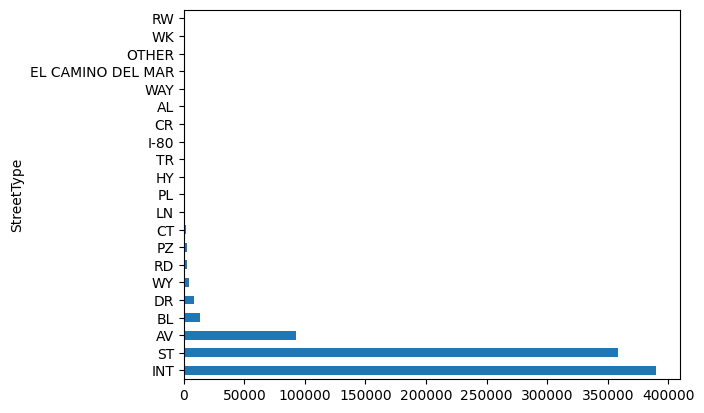

In [102]:
df_train['StreetType'].value_counts().plot.barh()

Nella tabella pivot successiva viene rappresentato il numero di crimini in funzione della tipologia e del distretto di polizia in cui si sono verificati.

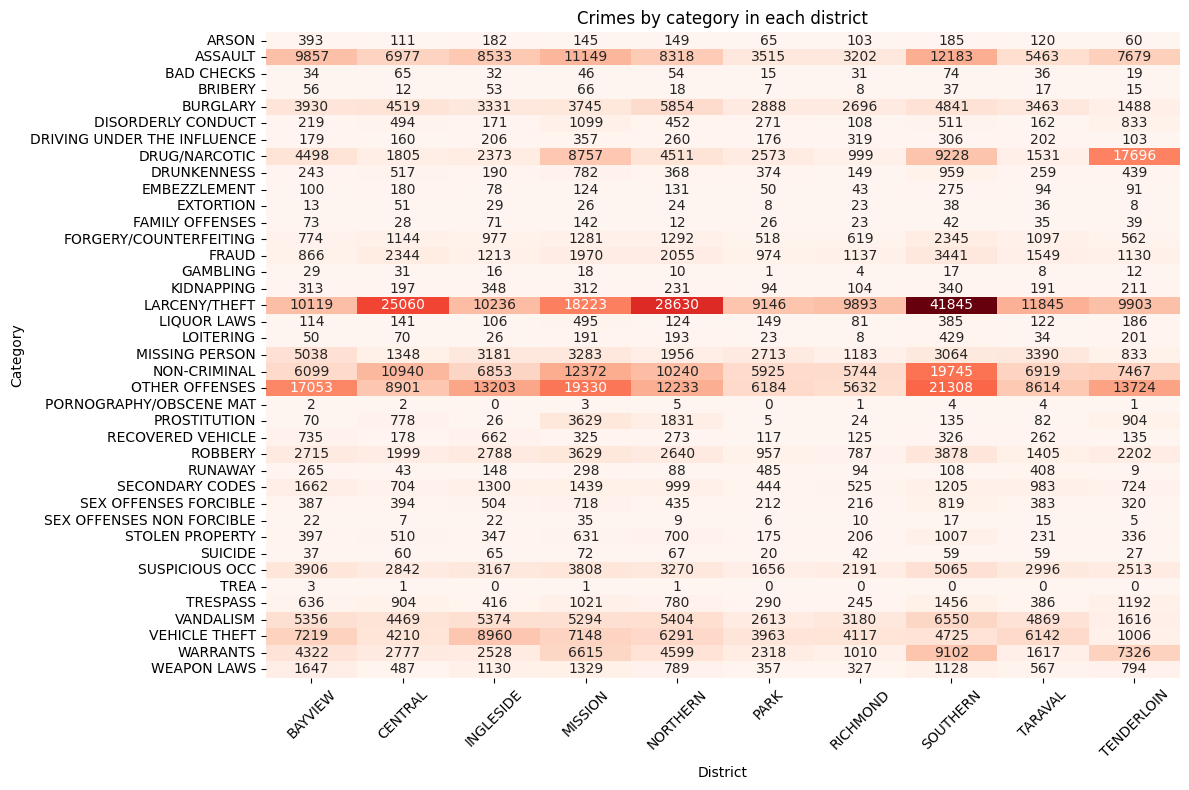

In [103]:
df_pivot = df_train[['Category', 'PdDistrict']]

pivot_table = pd.pivot_table(df_pivot, index='Category', columns='PdDistrict', aggfunc=len, fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='Reds', annot=True, fmt='d', cbar=False)
plt.title('Crimes by category in each district')
plt.xlabel('District')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<ipython-input-104-6180539d0469>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=45)


[Text(0, 0, 'NORTHERN'),
 Text(1, 0, 'PARK'),
 Text(2, 0, 'INGLESIDE'),
 Text(3, 0, 'BAYVIEW'),
 Text(4, 0, 'RICHMOND'),
 Text(5, 0, 'CENTRAL'),
 Text(6, 0, 'TARAVAL'),
 Text(7, 0, 'TENDERLOIN'),
 Text(8, 0, 'MISSION'),
 Text(9, 0, 'SOUTHERN')]

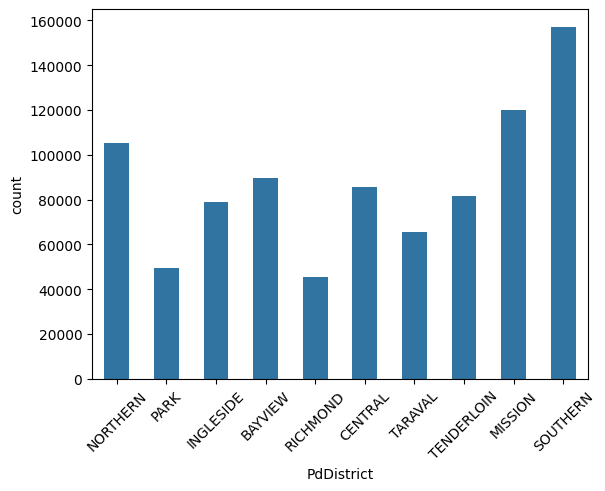

In [104]:
g = sns.countplot(
    x='PdDistrict',
    data=df_train,
    width= 0.5
  );
g.set_xticklabels(g.get_xticklabels(), rotation=45)

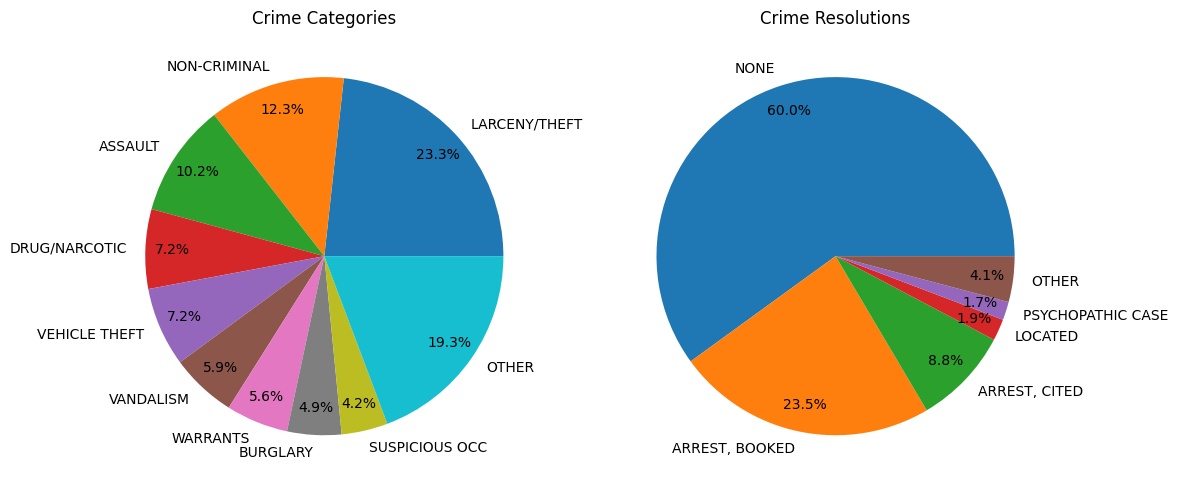

In [105]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 5))

df_filtered = df_train[df_train['Category'] != 'OTHER OFFENSES']

category_counts = df_filtered['Category'].value_counts()

threshold_category = 0.04

total_count = category_counts.sum()

other_count = category_counts[category_counts / total_count < threshold_category].sum()

filtered_counts_category = category_counts[category_counts / total_count >= threshold_category]

filtered_counts_category['OTHER'] = other_count

filtered_counts_category.plot(kind='pie', autopct='%1.1f%%', pctdistance=0.85, ax=ax1)







resolution_counts = df_train['Resolution'].value_counts()

threshold_resolution = 0.015

total_count = resolution_counts.sum()

other_count = resolution_counts[resolution_counts / total_count < threshold_resolution].sum()

filtered_counts_resolution = resolution_counts[resolution_counts / total_count >= threshold_resolution]

filtered_counts_resolution['OTHER'] = other_count

filtered_counts_resolution.plot(kind='pie', autopct='%1.1f%%', pctdistance=0.85, ax=ax2)

ax1.set_ylabel('')  # Nascondere l'etichetta dell'asse y del primo grafico
ax2.set_ylabel('')  # Nascondere l'etichetta dell'asse y del secondo grafico

ax1.set_title('Crime Categories')
ax2.set_title('Crime Resolutions')

plt.tight_layout()

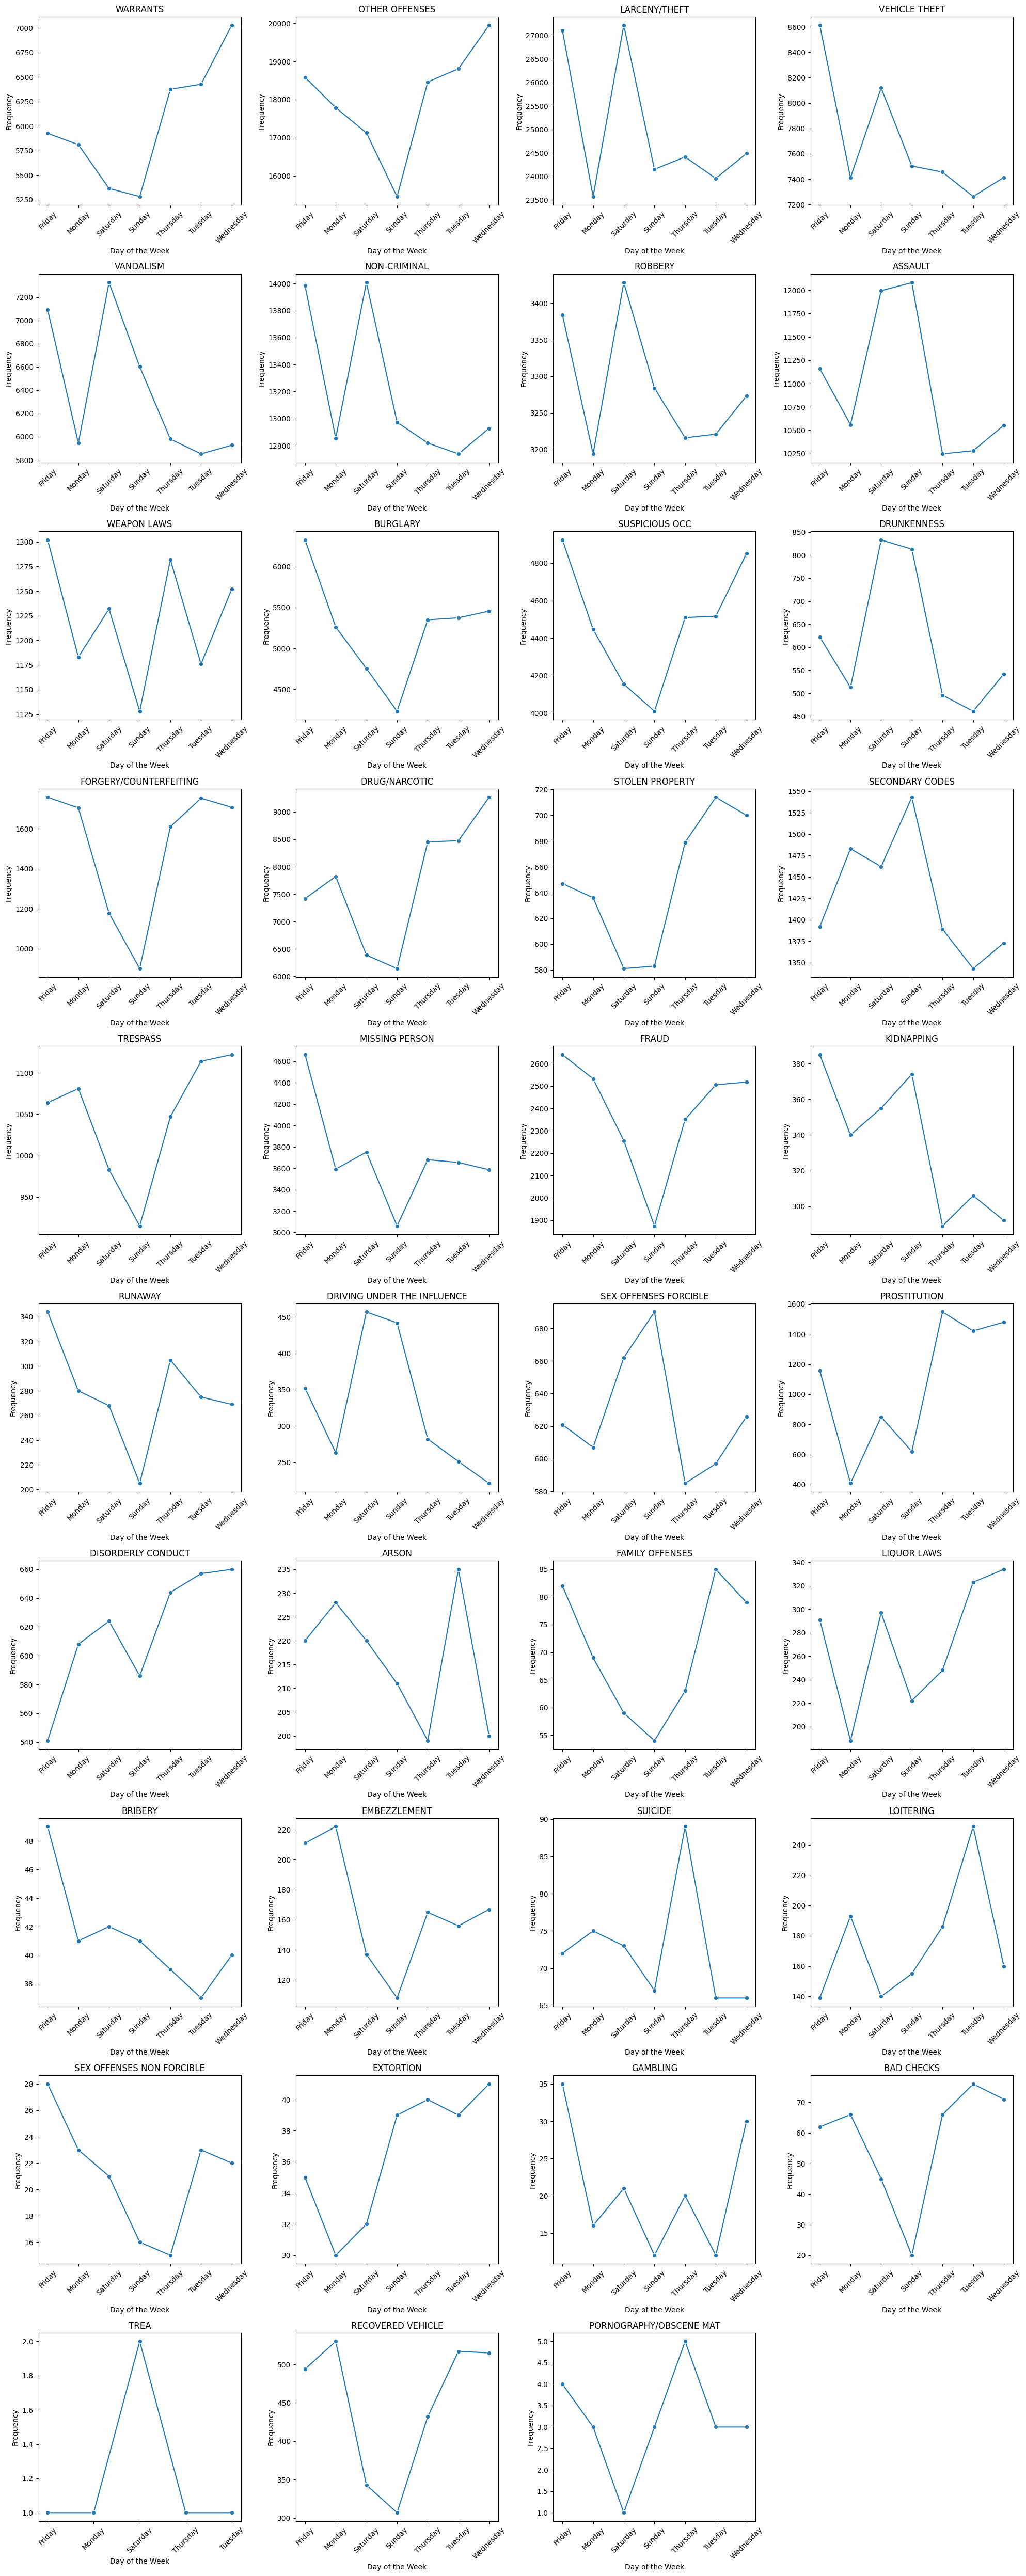

In [106]:
categories = df_train['Category'].unique()
num_categories = len(categories)
num_cols = 4
num_rows = math.ceil(num_categories / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
axes = axes.flatten()

for i, category in enumerate(categories):
    ax = axes[i]
    data_subset = df_train[df_train['Category'] == category]
    counts = data_subset.groupby('DayOfWeek').size().reindex()
    sns.lineplot(x=counts.index, y=counts.values, marker='o', ax=ax)
    ax.set_title(f'{category}')
    ax.set_xlabel('Day of the Week')
    ax.set_ylabel('Frequency')
    ax.tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

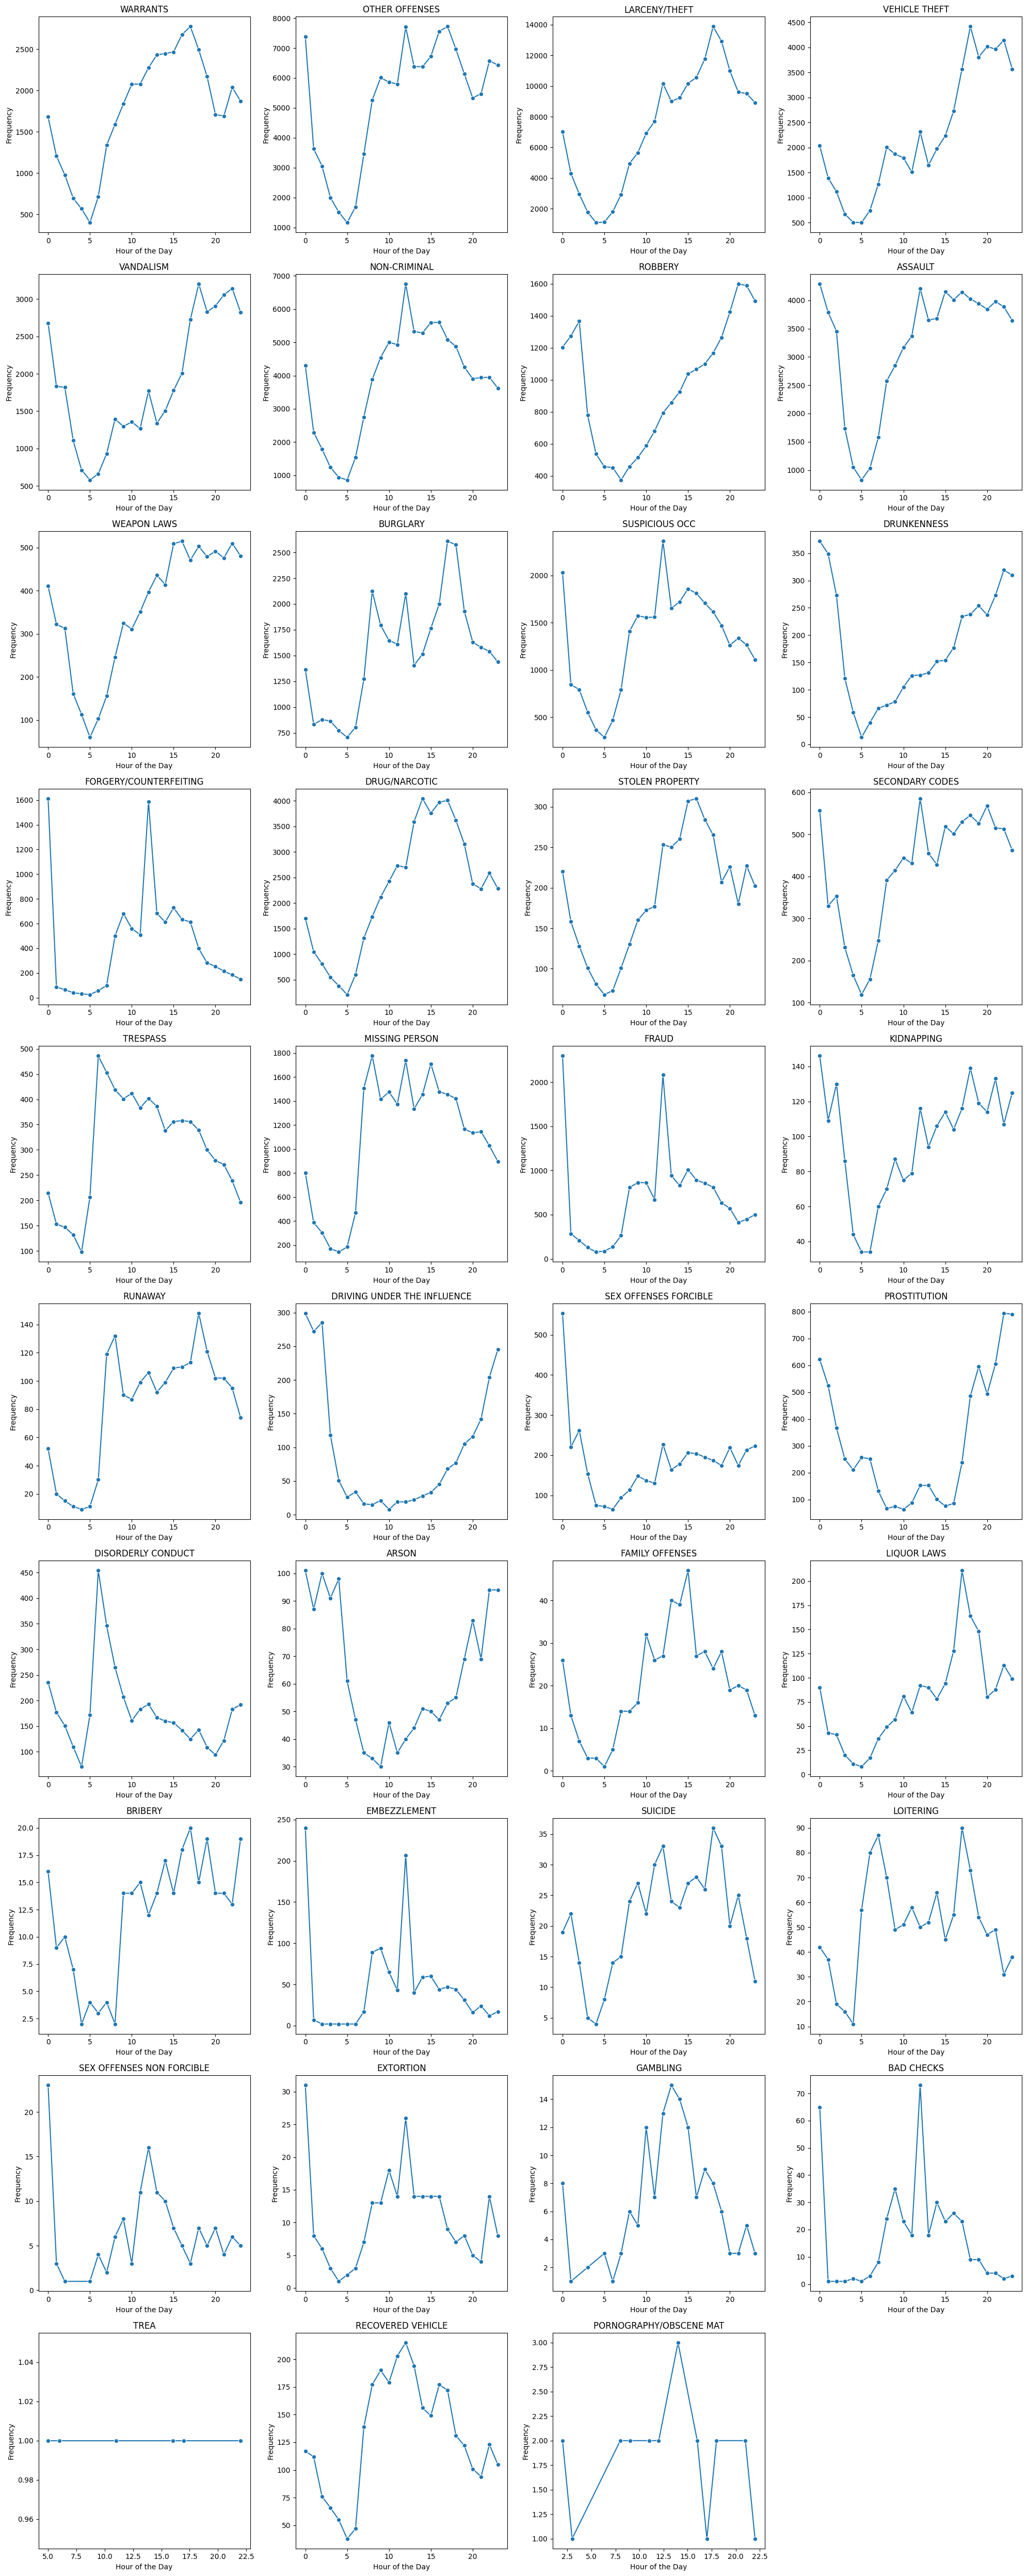

In [107]:
categories = df_train['Category'].unique()

num_categories = len(categories)
num_cols = 4
num_rows = - (- num_categories // num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
axes = axes.flatten()  # Flatten nel caso in cui axes sia 2D

for i, category in enumerate(categories):
    ax = axes[i]
    data_subset = df_train[df_train['Category'] == category]
    counts = data_subset['Hour'].value_counts().sort_index()  # Contare la frequenza per ogni ora
    sns.lineplot(x=counts.index, y=counts.values, marker='o', ax=ax)
    ax.set_title(f'{category}')
    ax.set_xlabel('Hour of the Day')
    ax.set_ylabel('Frequency')

# Rimuovere i subplot vuoti
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#Holiday feature
Analisi sulla frequenza dei crimini nei giorni delle festività statunitensi!

In [108]:
cal = calendar()
#ottengo lista di giorni festivi all'interno dell'intervallo [data più vecchia-data più recente]
holidays = cal.holidays(start=df_train['Dates'].min(), end=df_train['Dates'].max())

df_train['Holiday'] = df_train['Dates'].dt.date.astype('datetime64[ns]').isin(holidays)

In [109]:
cal = calendar()
#ottengo lista di giorni festivi all'interno dell'intervallo [data più vecchia-data più recente]
holidays = cal.holidays(start=df_test['Dates'].min(), end=df_test['Dates'].max())

df_test['Holiday'] = df_test['Dates'].dt.date.astype('datetime64[ns]').isin(holidays)

*holidays* conterrà una lista di giorni festivi compresi tra la data minima e la data massima presenti nel DataFrame

In [110]:
holidays

DatetimeIndex(['2003-01-20', '2003-02-17', '2003-05-26', '2003-07-04',
               '2003-09-01', '2003-10-13', '2003-11-11', '2003-11-27',
               '2003-12-25', '2004-01-01',
               ...
               '2014-05-26', '2014-07-04', '2014-09-01', '2014-10-13',
               '2014-11-11', '2014-11-27', '2014-12-25', '2015-01-01',
               '2015-01-19', '2015-02-16'],
              dtype='datetime64[ns]', length=122, freq=None)

In [111]:
df_train[df_train['Holiday'] == True]

Dates                Category  \
18357  2015-02-16 23:48:00           DRUG/NARCOTIC   
18358  2015-02-16 23:48:00          OTHER OFFENSES   
18359  2015-02-16 23:30:00            NON-CRIMINAL   
18360  2015-02-16 23:30:00               VANDALISM   
18361  2015-02-16 23:30:00           LARCENY/THEFT   
...                    ...                     ...   
875195 2003-01-20 00:01:00  FORGERY/COUNTERFEITING   
875196 2003-01-20 00:01:00          OTHER OFFENSES   
875197 2003-01-20 00:01:00           VEHICLE THEFT   
875198 2003-01-20 00:01:00           VEHICLE THEFT   
875199 2003-01-20 00:01:00  FORGERY/COUNTERFEITING   

                                    Descript DayOfWeek PdDistrict  \
18357         POSSESSION OF METH-AMPHETAMINE    Monday   SOUTHERN   
18358               TRAFFIC VIOLATION ARREST    Monday   SOUTHERN   
18359            DEATH REPORT, CAUSE UNKNOWN    Monday  INGLESIDE   
18360   MALICIOUS MISCHIEF, BREAKING WINDOWS    Monday    CENTRAL   
18361           GRAND THEFT FROM LOCKED AUTO    Monday   NORTHERN   
...                                      ...       ...        ...   
875195              CHECKS, FORGERY (FELONY)    Monday   SOUTHERN   
875196        VIOLATION OF RESTRAINING ORDER    Monday    MISSION   
875197                     STOLEN AUTOMOBILE    Monday       PARK   
875198              VEHICLE, RECOVERED, AUTO    Monday       PARK   
875199        COUNTERFEITING, COINS OR NOTES    Monday  INGLESIDE   

            Resolution                     Address           X          Y  \
18357   ARREST, BOOKED      800 Block of BRYANT ST -122.403405  37.775421   
18358   ARREST, BOOKED      800 Block of BRYANT ST -122.403405  37.775421   
18359        UNFOUNDED    200 Block of SCHWERIN ST -122.411730  37.709912   
18360             NONE     2700 Block of TAYLOR ST -122.415643  37.807762   
18361             NONE        0 Block of CHURCH ST -122.429110  37.769899   
...                ...                         ...         ...        ...   
875195            NONE         400 Block of 9TH ST -122.409629  37.772091   
875196  ARREST, BOOKED    1200 Block of VERMONT ST -122.403532  37.753800   
875197            NONE    0 Block of GARDENSIDE DR -122.444989  37.751778   
875198            NONE    0 Block of GARDENSIDE DR -122.444989  37.751778   
875199            NONE  900 Block of VISITACION AV -122.408363  37.711629   

        Minute  Hour  Day  Month  Year StreetType  Holiday  
18357       48    23   16      2  2015         ST     True  
18358       48    23   16      2  2015         ST     True  
18359       30    23   16      2  2015         ST     True  
18360       30    23   16      2  2015         ST     True  
18361       30    23   16      2  2015         ST     True  
...        ...   ...  ...    ...   ...        ...      ...  
875195       1     0   20      1  2003         ST     True  
875196       1     0   20      1  2003         ST     True  
875197       1     0   20      1  2003        INT     True  
875198       1     0   20      1  2003        INT     True  
875199       1     0   20      1  2003         AV     True  

[25653 rows x 16 columns]

In [112]:
df_train.head()

Dates        Category                      Descript  \
0 2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1 2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2 2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  Minute  Hour  Day  Month  Year StreetType  Holiday  
0 -122.425892  37.774599      53    23   13      5  2015        INT    False  
1 -122.425892  37.774599      53    23   13      5  2015        INT    False  
2 -122.424363  37.800414      33    23   13      5  2015        INT    False  
3 -122.426995  37.800873      30    23   13      5  2015        INT    False  
4 -122.438738  37.771541      30    23   13      5  2015         ST    False

In [113]:
df_test[df_test['Holiday'] == True]

Id               Dates DayOfWeek  PdDistrict  \
27957    27957 2015-01-01 23:55:00  Thursday     CENTRAL   
27958    27958 2015-01-01 23:43:00  Thursday  TENDERLOIN   
27959    27959 2015-01-01 23:30:00  Thursday     MISSION   
27960    27960 2015-01-01 23:15:00  Thursday     TARAVAL   
27961    27961 2015-01-01 23:15:00  Thursday     TARAVAL   
...        ...                 ...       ...         ...   
845419  845419 2003-07-04 00:01:00    Friday    SOUTHERN   
845420  845420 2003-07-04 00:01:00    Friday     BAYVIEW   
845421  845421 2003-07-04 00:01:00    Friday   INGLESIDE   
845422  845422 2003-07-04 00:01:00    Friday    NORTHERN   
845423  845423 2003-07-04 00:01:00    Friday   INGLESIDE   

                                 Address           X          Y  Minute  Hour  \
27957         STOCKTON ST / FRANCISCO ST -122.410127  37.805098      55    23   
27958            OFARRELL ST / LARKIN ST -122.417904  37.785167      43    23   
27959            500 Block of DOLORES ST -122.425842  37.760622      30    23   
27960            0 Block of CRESTLAKE DR -122.481966  37.735375      15    23   
27961            0 Block of CRESTLAKE DR -122.481966  37.735375      15    23   
...                                  ...         ...        ...     ...   ...   
845419            800 Block of BRYANT ST -122.403405  37.775421       1     0   
845420        1100 Block of JAMESTOWN AV -122.395998  37.719947       1     0   
845421  5200 Block of DIAMOND HEIGHTS BL -122.438840  37.744459       1     0   
845422           1400 Block of LARKIN ST -122.419062  37.791264       1     0   
845423           300 Block of MAYNARD ST -122.422742  37.729871       1     0   

        Day  Month  Year StreetType  Holiday  
27957     1      1  2015        INT     True  
27958     1      1  2015        INT     True  
27959     1      1  2015         ST     True  
27960     1      1  2015        INT     True  
27961     1      1  2015        INT     True  
...     ...    ...   ...        ...      ...  
845419    4      7  2003         ST     True  
845420    4      7  2003        INT     True  
845421    4      7  2003         BL     True  
845422    4      7  2003         ST     True  
845423    4      7  2003        INT     True  

[18316 rows x 14 columns]

Calcolo della percenuale di crimini commessi durante le festività

In [114]:
df_holidays = df_train[['Category', 'PdDistrict', 'Year']] [df_train['Holiday'] == True]

percentage = (df_holidays['Category'].value_counts().sum() / df_train.value_counts().sum())*100

print(f"{percentage:.2f}%")

2.92%


Nella tabella pivot successiva viene rappresentato il numero di crimini in funzione della tipologia e del distretto di polizia in cui si sono verificati durante le festività

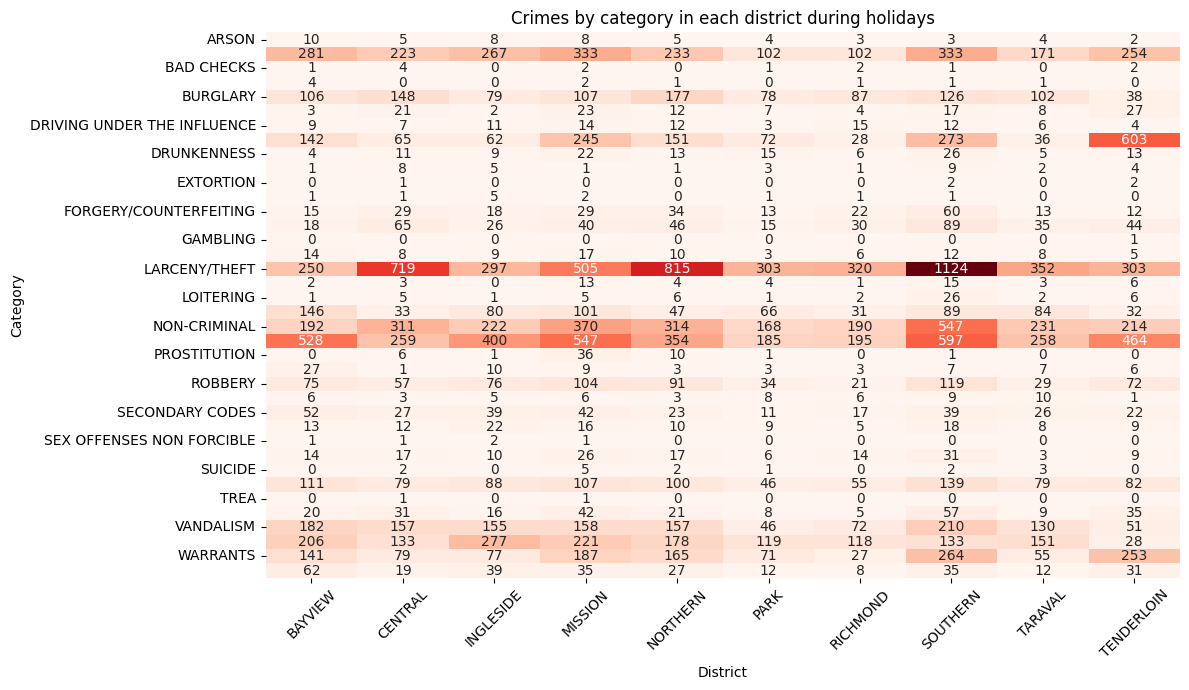

In [115]:
df_pivot = df_train[['Category', 'PdDistrict']] [df_train['Holiday'] == True]

pivot_table = pd.pivot_table(df_pivot, index='Category', columns='PdDistrict', aggfunc=len, fill_value=0)

plt.figure(figsize=(12, 7))
sns.heatmap(pivot_table, cmap='Reds', annot=True, fmt='d', cbar=False)
plt.title('Crimes by category in each district during holidays')
plt.xlabel('District')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# TIME SLOTS FEATURE
Andiamo ad aggiungere la feature *timeSlot* per categorizzare i crimini sulla base dell'orario in cui si verificano:

MORNING -> 6-12

AFTERNOON -> 12-18

EVENING -> 18-0

NIGHT -> 0-6

In [116]:
#definition of a function that adds feature timeSlot: night, morning, afternoon and evening

def map_time_slots(hour):

     if hour in range(0,6):
         return "Night"
     elif hour in range(6,12):
         return "Morning"
     elif hour in range(12,18):
         return "Afternoon"
     elif hour in range(18,24):
         return "Evening"

df_train['timeSlot'] = df_train['Hour'].map(map_time_slots)
df_test['timeSlot'] = df_test['Hour'].map(map_time_slots)

Grafico a barre rappresentante il numero di crimini per ogni timeSlot

<Axes: xlabel='timeSlot'>

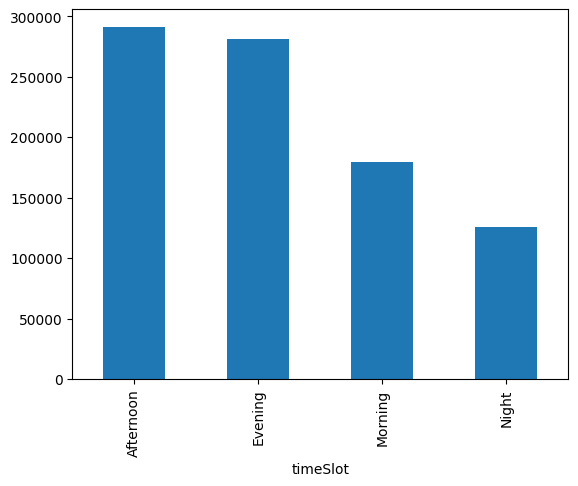

In [117]:
df_train['timeSlot'].value_counts().plot.bar()

Nella tabella pivot successiva viene rappresentato il numero di crimini in funzione della tipologia e del orario della giornata in cui si è verificato

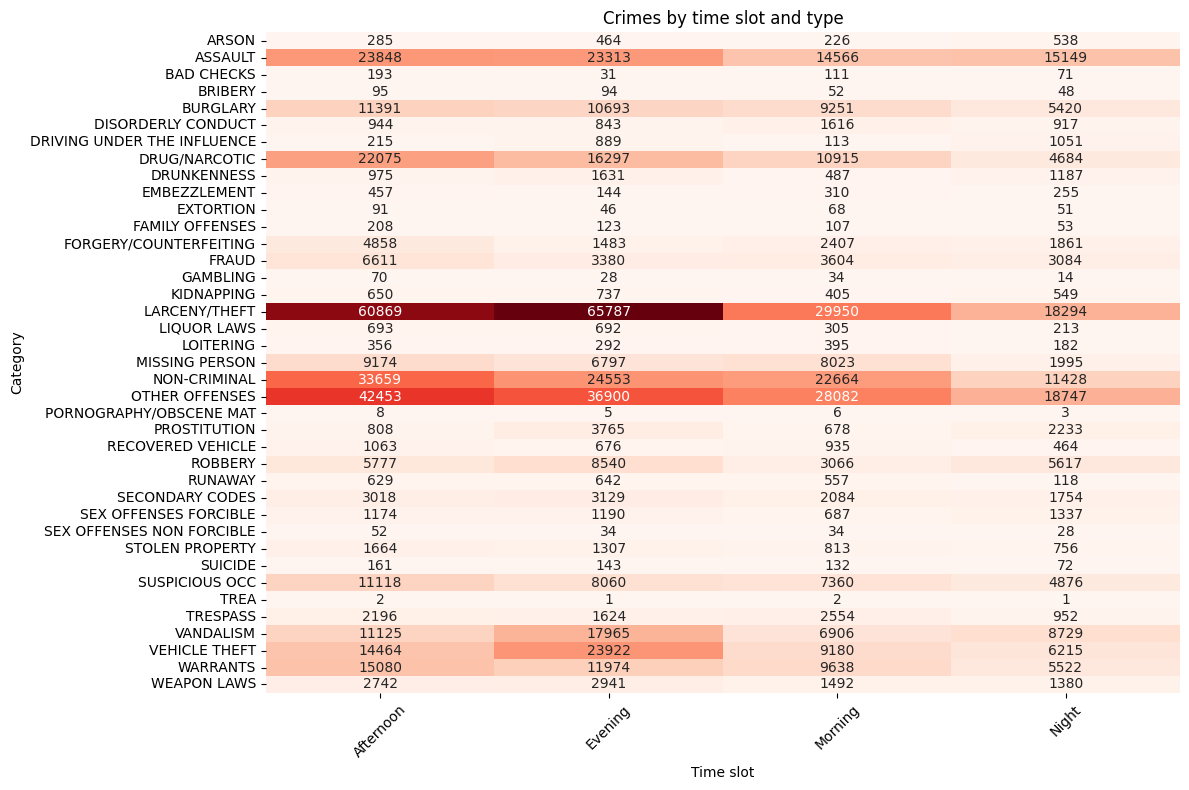

In [118]:
plt.figure(figsize=(12, 8))
crime_count_matrix = df_train.pivot_table(index='Category', columns='timeSlot', aggfunc='size', fill_value=0)
sns.heatmap(crime_count_matrix, cmap='Reds', annot=True, fmt='d',cbar=False)
plt.title('Crimes by time slot and type')
plt.xlabel('Time slot')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Nella tabella pivot successiva viene rappresentato il numero di crimini in funzione della tipologia e del giorno in cui si è verificato

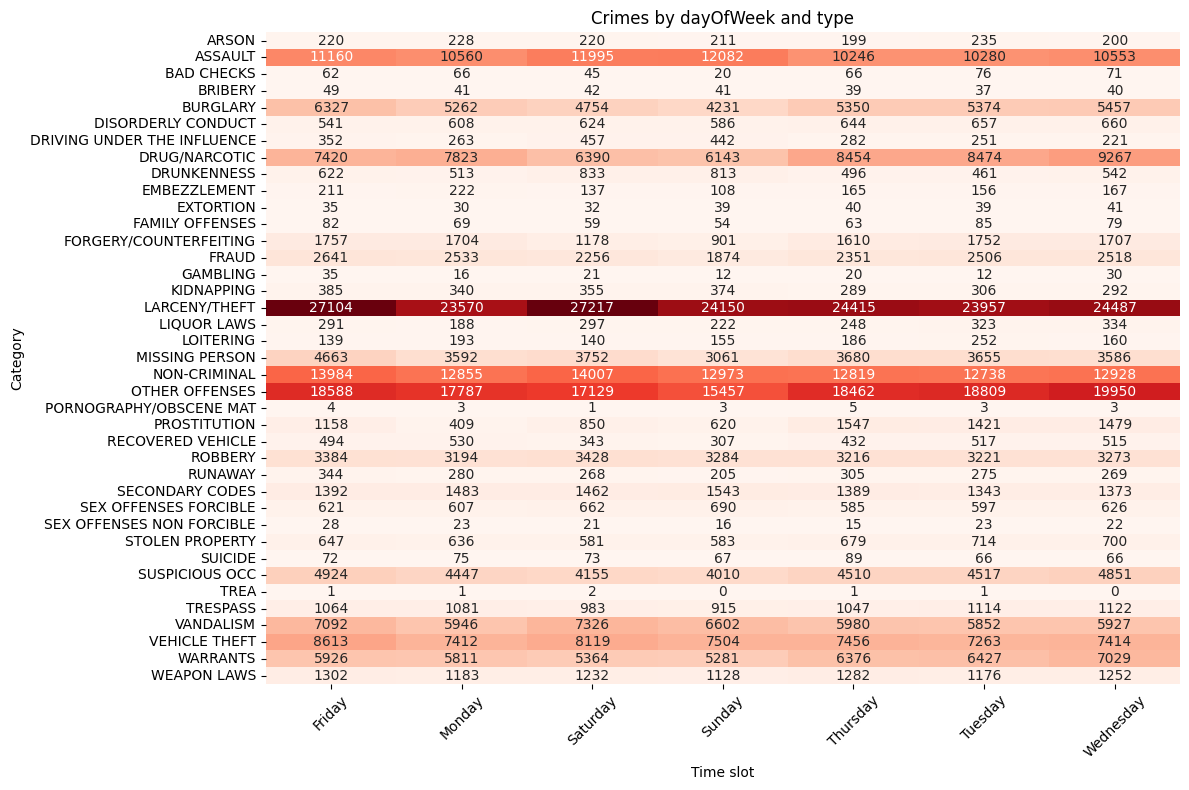

In [119]:
plt.figure(figsize=(12, 8))
crime_count_matrix = df_train.pivot_table(index='Category', columns='DayOfWeek', aggfunc='size', fill_value=0)
sns.heatmap(crime_count_matrix, cmap='Reds', annot=True, fmt='d',cbar=False)
plt.title('Crimes by dayOfWeek and type')
plt.xlabel('Time slot')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# ANALISI DELLA CATEGORIA OTHER OFFENSES

Analizziamo i crimini categorizzati come *Other Offenses* valutandone il rispettivo *Descript*

In [120]:
df_other = df_train[df_train['Category'] == 'OTHER OFFENSES']['Descript']
df_other.unique()
df_other.value_counts()

Descript
DRIVERS LICENSE, SUSPENDED OR REVOKED                   26839
TRAFFIC VIOLATION                                       16471
RESISTING ARREST                                         8983
MISCELLANEOUS INVESTIGATION                              8389
PROBATION VIOLATION                                      8016
                                                        ...  
SOLICITING MINOR TO COMMIT FELONY                           1
DOG, FIGHTING;  OWNING, FIGHTING, OR ATTENDING FIGHT        1
HAZARDOUS MATERIALS, DUMP OIL INTO SEWERS                   1
DRIVING, DRAG RACING                                        1
REFUSAL TO IDENTIFY                                         1
Name: count, Length: 169, dtype: int64

In [121]:
category_counts = df_other.value_counts()

total_count = category_counts.sum()

print(total_count)

126182


[Text(0, 0, 'DRIVERS LICENSE, SUSPENDED OR REVOKED'),
 Text(1, 0, 'TRAFFIC VIOLATION'),
 Text(2, 0, 'RESISTING ARREST'),
 Text(3, 0, 'MISCELLANEOUS INVESTIGATION'),
 Text(4, 0, 'PROBATION VIOLATION'),
 Text(5, 0, 'LOST/STOLEN LICENSE PLATE'),
 Text(6, 0, 'VIOLATION OF RESTRAINING ORDER'),
 Text(7, 0, 'PAROLE VIOLATION'),
 Text(8, 0, 'TRAFFIC VIOLATION ARREST'),
 Text(9, 0, 'OTHER')]

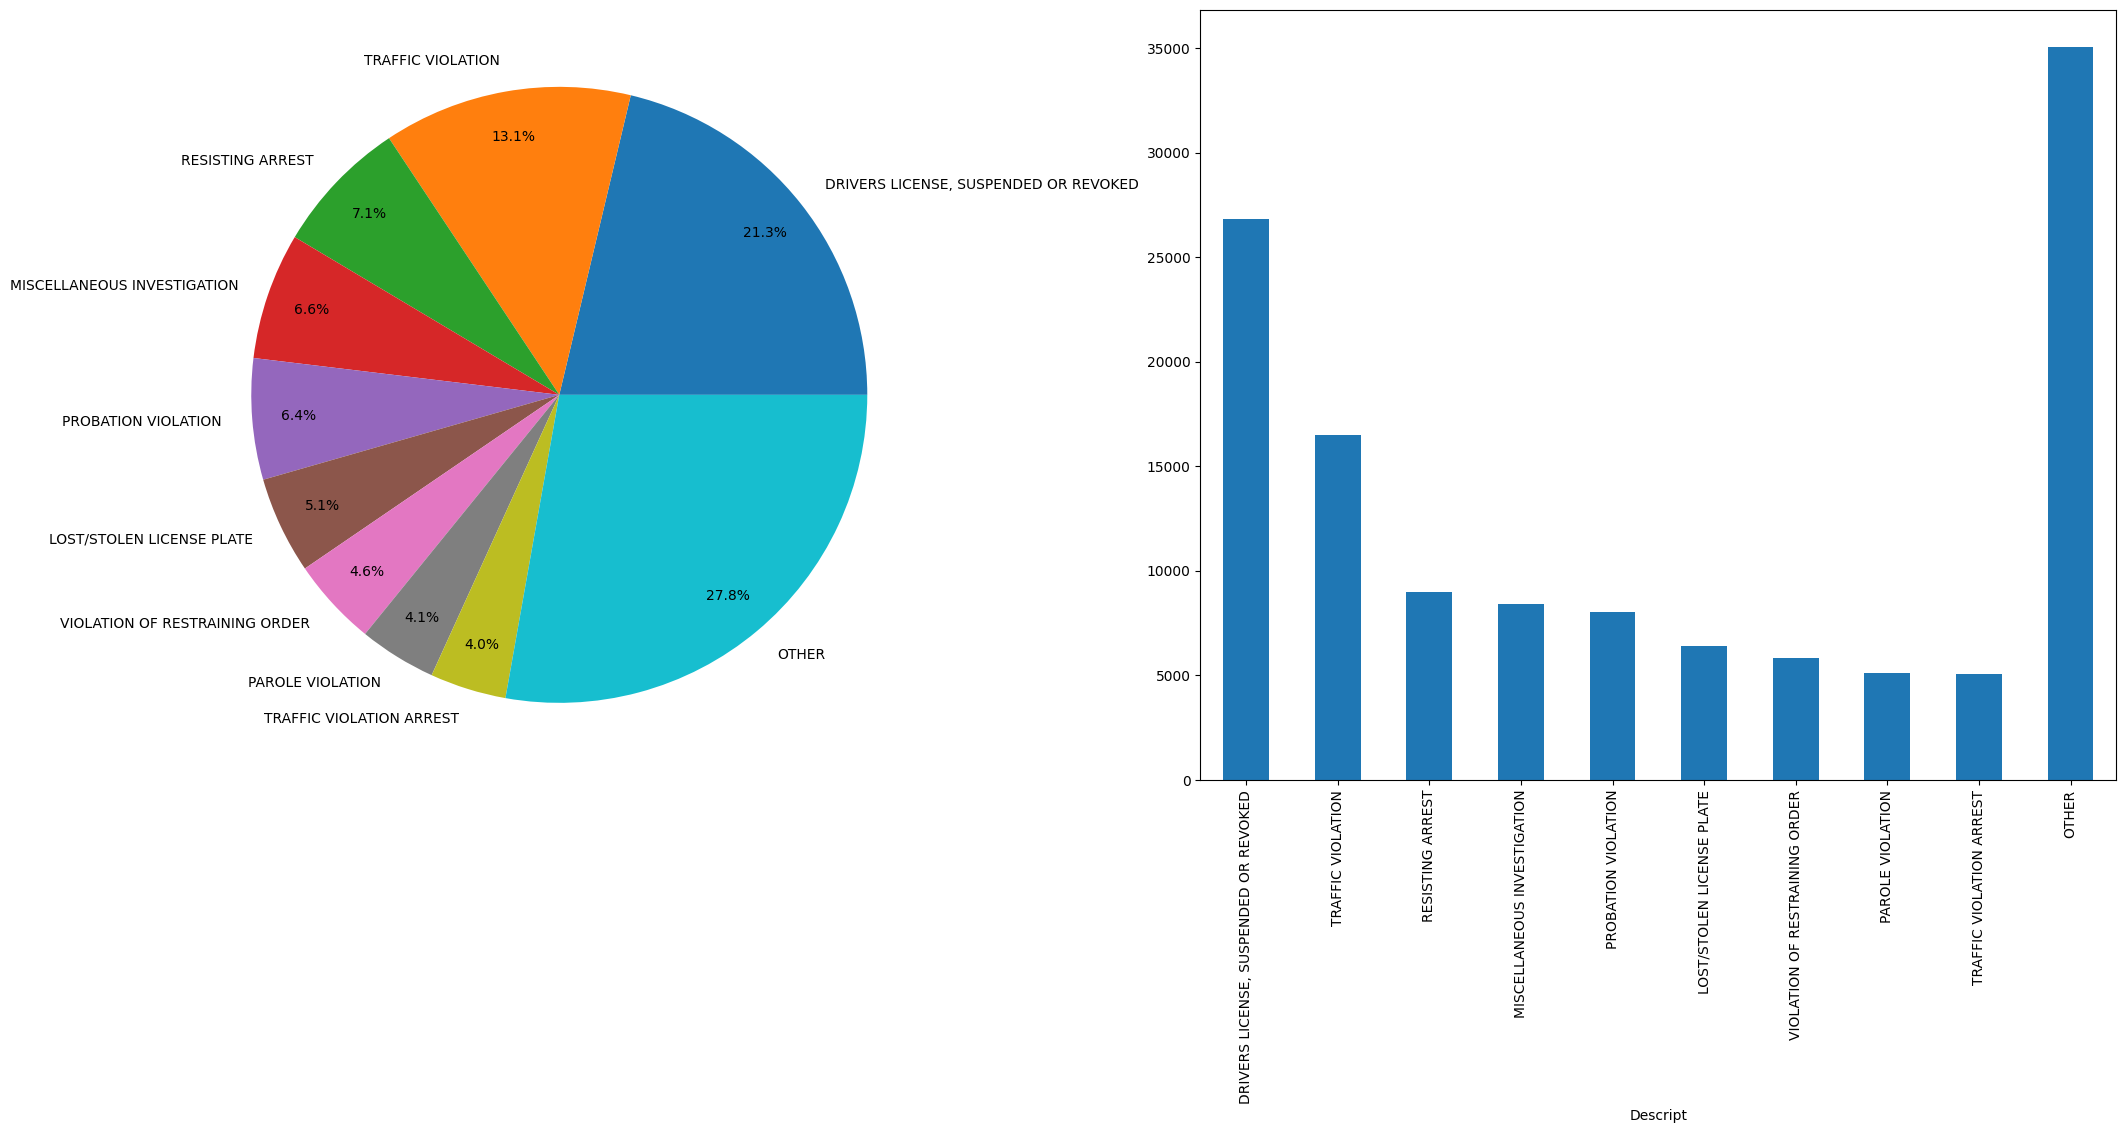

In [122]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(26, 10))

category_counts = df_other.value_counts()

threshold_category = 0.03  #4%

total_count = category_counts.sum()

other_count = category_counts[category_counts / total_count < threshold_category].sum()

filtered_counts_category = category_counts[category_counts / total_count >= threshold_category]

filtered_counts_category['OTHER'] = other_count

filtered_counts_category.plot(kind='pie', autopct='%1.1f%%', pctdistance=0.85, ax=ax1 ).set_ylabel('')

g = filtered_counts_category.plot.bar()

g.set_xticklabels(g.get_xticklabels(), rotation=90)


# FEATURE ENCODING


In [124]:
df_train.head()

Dates        Category                      Descript  \
0 2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1 2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2 2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek  PdDistrict      Resolution                    Address  \
0  Wednesday           0  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday           0  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday           0  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday           0            NONE   1500 Block of LOMBARD ST   
4  Wednesday           1            NONE  100 Block of BRODERICK ST   

            X          Y  Minute  Hour  Day  Month  Year StreetType  Holiday  \
0 -122.425892  37.774599      53    23   13      5  2015        INT    False   
1 -122.425892  37.774599      53    23   13      5  2015        INT    False   
2 -122.424363  37.800414      33    23   13      5  2015        INT    False   
3 -122.426995  37.800873      30    23   13      5  2015        INT    False   
4 -122.438738  37.771541      30    23   13      5  2015         ST    False   

  timeSlot  
0  Evening  
1  Evening  
2  Evening  
3  Evening  
4  Evening

PD District

In [123]:
pd_district = df_train['PdDistrict'].unique()
pdDist_dict = {pd_district: index for index, pd_district in enumerate(pd_district)}

df_train['PdDistrict'].replace(pdDist_dict, inplace=True)
df_test['PdDistrict'].replace(pdDist_dict, inplace=True)

In [125]:
df_test.head()

Id               Dates DayOfWeek  PdDistrict                   Address  \
0   0 2015-05-10 23:59:00    Sunday           3   2000 Block of THOMAS AV   
1   1 2015-05-10 23:51:00    Sunday           3        3RD ST / REVERE AV   
2   2 2015-05-10 23:50:00    Sunday           0    2000 Block of GOUGH ST   
3   3 2015-05-10 23:45:00    Sunday           2  4700 Block of MISSION ST   
4   4 2015-05-10 23:45:00    Sunday           2  4700 Block of MISSION ST   

            X          Y  Minute  Hour  Day  Month  Year StreetType  Holiday  \
0 -122.399588  37.735051      59    23   10      5  2015         AV    False   
1 -122.391523  37.732432      51    23   10      5  2015        INT    False   
2 -122.426002  37.792212      50    23   10      5  2015         ST    False   
3 -122.437394  37.721412      45    23   10      5  2015         ST    False   
4 -122.437394  37.721412      45    23   10      5  2015         ST    False   

  timeSlot  
0  Evening  
1  Evening  
2  Evening  
3  Evening  
4  Evening

DAY OF WEEK

In [126]:
listDays = df_train['DayOfWeek'].unique().tolist()

In [127]:
right_order = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

In [128]:
df_train['DayOfWeek'].replace(right_order, inplace=True)
df_test['DayOfWeek'].replace(right_order, inplace=True)

YEAR

In [129]:
data = [df_train , df_test]

for dataset in data:
    year_le = LabelEncoder()
    year_le.fit(dataset['Year'].unique())
    print(list(year_le.classes_))

    dataset['Year']=year_le.transform(dataset['Year'])

[2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
[2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


In [130]:
dict(zip(year_le.classes_, year_le.transform(year_le.classes_)))

{2003: 0,
 2004: 1,
 2005: 2,
 2006: 3,
 2007: 4,
 2008: 5,
 2009: 6,
 2010: 7,
 2011: 8,
 2012: 9,
 2013: 10,
 2014: 11,
 2015: 12}

STREET TYPE

In [131]:
data = [df_train, df_test]

for dataset in data:
    st_le = LabelEncoder()
    st_le.fit(dataset['StreetType'].unique())
    print(list(st_le.classes_))
    dataset['StreetType']=st_le.transform(dataset['StreetType'])

['AL', 'AV', 'BL', 'CR', 'CT', 'DR', 'EL CAMINO DEL MAR', 'HY', 'I-80', 'INT', 'LN', 'OTHER', 'PL', 'PZ', 'RD', 'RW', 'ST', 'TR', 'WAY', 'WK', 'WY']
['AL', 'AV', 'BL', 'CR', 'CT', 'DR', 'EL CAMINO DEL MAR', 'HY', 'I-80', 'INT', 'LN', 'OTHER', 'PL', 'PZ', 'RD', 'RW', 'ST', 'TR', 'WAY', 'WK', 'WY']


In [132]:
dict(zip(st_le.classes_, st_le.transform(st_le.classes_)))

{'AL': 0,
 'AV': 1,
 'BL': 2,
 'CR': 3,
 'CT': 4,
 'DR': 5,
 'EL CAMINO DEL MAR': 6,
 'HY': 7,
 'I-80': 8,
 'INT': 9,
 'LN': 10,
 'OTHER': 11,
 'PL': 12,
 'PZ': 13,
 'RD': 14,
 'RW': 15,
 'ST': 16,
 'TR': 17,
 'WAY': 18,
 'WK': 19,
 'WY': 20}

Holiday

In [133]:
df_train['Holiday'].replace(False, 0, inplace=True)
df_train['Holiday'].replace(True, 1, inplace=True)

In [134]:
df_test['Holiday'].replace(False, 0, inplace=True)
df_test['Holiday'].replace(True, 1, inplace=True)

CATEGORY

In [135]:
data = [df_train]

for dataset in data:
    cat_le = LabelEncoder()
    cat_le.fit(dataset['Category'].unique())
    print(list(cat_le.classes_))
    dataset['Category']=cat_le.transform(dataset['Category'])

['ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY', 'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE', 'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION', 'FAMILY OFFENSES', 'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING', 'KIDNAPPING', 'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING', 'MISSING PERSON', 'NON-CRIMINAL', 'OTHER OFFENSES', 'PORNOGRAPHY/OBSCENE MAT', 'PROSTITUTION', 'RECOVERED VEHICLE', 'ROBBERY', 'RUNAWAY', 'SECONDARY CODES', 'SEX OFFENSES FORCIBLE', 'SEX OFFENSES NON FORCIBLE', 'STOLEN PROPERTY', 'SUICIDE', 'SUSPICIOUS OCC', 'TREA', 'TRESPASS', 'VANDALISM', 'VEHICLE THEFT', 'WARRANTS', 'WEAPON LAWS']


In [136]:
categoryDict = dict(zip(cat_le.classes_, cat_le.transform(cat_le.classes_)))

In [137]:
print(categoryDict)

{'ARSON': 0, 'ASSAULT': 1, 'BAD CHECKS': 2, 'BRIBERY': 3, 'BURGLARY': 4, 'DISORDERLY CONDUCT': 5, 'DRIVING UNDER THE INFLUENCE': 6, 'DRUG/NARCOTIC': 7, 'DRUNKENNESS': 8, 'EMBEZZLEMENT': 9, 'EXTORTION': 10, 'FAMILY OFFENSES': 11, 'FORGERY/COUNTERFEITING': 12, 'FRAUD': 13, 'GAMBLING': 14, 'KIDNAPPING': 15, 'LARCENY/THEFT': 16, 'LIQUOR LAWS': 17, 'LOITERING': 18, 'MISSING PERSON': 19, 'NON-CRIMINAL': 20, 'OTHER OFFENSES': 21, 'PORNOGRAPHY/OBSCENE MAT': 22, 'PROSTITUTION': 23, 'RECOVERED VEHICLE': 24, 'ROBBERY': 25, 'RUNAWAY': 26, 'SECONDARY CODES': 27, 'SEX OFFENSES FORCIBLE': 28, 'SEX OFFENSES NON FORCIBLE': 29, 'STOLEN PROPERTY': 30, 'SUICIDE': 31, 'SUSPICIOUS OCC': 32, 'TREA': 33, 'TRESPASS': 34, 'VANDALISM': 35, 'VEHICLE THEFT': 36, 'WARRANTS': 37, 'WEAPON LAWS': 38}


TIME SLOT

In [138]:
data = [df_train, df_test]

for dataset in data:
    ts_le = LabelEncoder()
    ts_le.fit(dataset['timeSlot'].unique())
    print(list(ts_le.classes_))
    dataset['timeSlot']=ts_le.transform(dataset['timeSlot'])

['Afternoon', 'Evening', 'Morning', 'Night']
['Afternoon', 'Evening', 'Morning', 'Night']


In [139]:
dict(zip(ts_le.classes_, ts_le.transform(ts_le.classes_)))

{'Afternoon': 0, 'Evening': 1, 'Morning': 2, 'Night': 3}

In [140]:
dict(zip(ts_le.classes_, ts_le.transform(ts_le.classes_)))

{'Afternoon': 0, 'Evening': 1, 'Morning': 2, 'Night': 3}

In [141]:
df_train.head()

Dates  Category                      Descript  DayOfWeek  \
0 2015-05-13 23:53:00        37                WARRANT ARREST          3   
1 2015-05-13 23:53:00        21      TRAFFIC VIOLATION ARREST          3   
2 2015-05-13 23:33:00        21      TRAFFIC VIOLATION ARREST          3   
3 2015-05-13 23:30:00        16  GRAND THEFT FROM LOCKED AUTO          3   
4 2015-05-13 23:30:00        16  GRAND THEFT FROM LOCKED AUTO          3   

   PdDistrict      Resolution                    Address           X  \
0           0  ARREST, BOOKED         OAK ST / LAGUNA ST -122.425892   
1           0  ARREST, BOOKED         OAK ST / LAGUNA ST -122.425892   
2           0  ARREST, BOOKED  VANNESS AV / GREENWICH ST -122.424363   
3           0            NONE   1500 Block of LOMBARD ST -122.426995   
4           1            NONE  100 Block of BRODERICK ST -122.438738   

           Y  Minute  Hour  Day  Month  Year  StreetType  Holiday  timeSlot  
0  37.774599      53    23   13      5    12           9        0         1  
1  37.774599      53    23   13      5    12           9        0         1  
2  37.800414      33    23   13      5    12           9        0         1  
3  37.800873      30    23   13      5    12           9        0         1  
4  37.771541      30    23   13      5    12          16        0         1

In [142]:
df_test.tail()

Id               Dates  DayOfWeek  PdDistrict  \
884257  884257 2003-01-01 00:01:00          3           8   
884258  884258 2003-01-01 00:01:00          3           0   
884259  884259 2003-01-01 00:01:00          3           2   
884260  884260 2003-01-01 00:01:00          3           3   
884261  884261 2003-01-01 00:01:00          3           6   

                            Address           X          Y  Minute  Hour  Day  \
884257      2600 Block of BRYANT ST -122.408983  37.751987       1     0    1   
884258  1900 Block of WASHINGTON ST -122.425342  37.792681       1     0    1   
884259     5500 Block of MISSION ST -122.445418  37.712075       1     0    1   
884260      1500 Block of HUDSON AV -122.387394  37.739479       1     0    1   
884261       1500 Block of SLOAT BL -122.489714  37.733950       1     0    1   

        Month  Year  StreetType  Holiday  timeSlot  
884257      1     0          16        0         3  
884258      1     0          16        0         3  
884259      1     0          16        0         3  
884260      1     0           1        0         3  
884261      1     0           2        0         3

# FEATURE REMOVING
Dai risultati ottenuti dal feature encoding abbiamo rimosso alcune features aventi scarsa importanza a nostro parere.

Address -> possiamo basarci  sulle coordinate

In [143]:
df_train.drop(['Address'] ,axis=1, inplace=True)
df_test.drop(['Address'] ,axis=1, inplace=True)

Dates-> estrapolate features di granularità più fine. [Minute, Hour, Day, Month, Year]

In [144]:
df_train.drop(['Dates'] ,axis=1, inplace=True)
df_test.drop(['Dates'] ,axis=1, inplace=True)

Maggioranza di *Resolution* è none.

In [145]:
df_train.drop(['Resolution'] ,axis=1, inplace=True)

In [146]:
df_train.drop(['Descript'] ,axis=1, inplace=True)

In [147]:
df_test.drop(['Id'] ,axis=1, inplace=True)

In [148]:
df_train.head()

Category  DayOfWeek  PdDistrict           X          Y  Minute  Hour  Day  \
0        37          3           0 -122.425892  37.774599      53    23   13   
1        21          3           0 -122.425892  37.774599      53    23   13   
2        21          3           0 -122.424363  37.800414      33    23   13   
3        16          3           0 -122.426995  37.800873      30    23   13   
4        16          3           1 -122.438738  37.771541      30    23   13   

   Month  Year  StreetType  Holiday  timeSlot  
0      5    12           9        0         1  
1      5    12           9        0         1  
2      5    12           9        0         1  
3      5    12           9        0         1  
4      5    12          16        0         1

In [149]:
df_test.head()

DayOfWeek  PdDistrict           X          Y  Minute  Hour  Day  Month  \
0          7           3 -122.399588  37.735051      59    23   10      5   
1          7           3 -122.391523  37.732432      51    23   10      5   
2          7           0 -122.426002  37.792212      50    23   10      5   
3          7           2 -122.437394  37.721412      45    23   10      5   
4          7           2 -122.437394  37.721412      45    23   10      5   

   Year  StreetType  Holiday  timeSlot  
0    12           1        0         1  
1    12           9        0         1  
2    12          16        0         1  
3    12          16        0         1  
4    12          16        0         1

In [150]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Category    878049 non-null  int64  
 1   DayOfWeek   878049 non-null  int64  
 2   PdDistrict  878049 non-null  int64  
 3   X           878049 non-null  float64
 4   Y           878049 non-null  float64
 5   Minute      878049 non-null  int64  
 6   Hour        878049 non-null  int64  
 7   Day         878049 non-null  int64  
 8   Month       878049 non-null  int64  
 9   Year        878049 non-null  int64  
 10  StreetType  878049 non-null  int64  
 11  Holiday     878049 non-null  int64  
 12  timeSlot    878049 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 87.1 MB


In [151]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   DayOfWeek   884262 non-null  int64  
 1   PdDistrict  884262 non-null  int64  
 2   X           884262 non-null  float64
 3   Y           884262 non-null  float64
 4   Minute      884262 non-null  int64  
 5   Hour        884262 non-null  int64  
 6   Day         884262 non-null  int64  
 7   Month       884262 non-null  int64  
 8   Year        884262 non-null  int64  
 9   StreetType  884262 non-null  int64  
 10  Holiday     884262 non-null  int64  
 11  timeSlot    884262 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 81.0 MB


# ⚠️ Per migliori prestazioni nel fit dei modelli passiamo a 16bit per le nostre features ⚠️

In [152]:
# # Convert all to 32 bit integers so less memory and will train faster (no loss in data since our integers dont reach)

columns_to_convert = ['DayOfWeek', 'PdDistrict', 'X', 'Y', 'Minute', 'Hour', 'Day', 'Month', 'Year',
                      'StreetType', 'Holiday', 'timeSlot']
df_train[columns_to_convert] = df_train[columns_to_convert].astype('int16')
df_test[columns_to_convert] = df_test[columns_to_convert].astype('int16')

df_train.info()
print("")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   Category    878049 non-null  int64
 1   DayOfWeek   878049 non-null  int16
 2   PdDistrict  878049 non-null  int16
 3   X           878049 non-null  int16
 4   Y           878049 non-null  int16
 5   Minute      878049 non-null  int16
 6   Hour        878049 non-null  int16
 7   Day         878049 non-null  int16
 8   Month       878049 non-null  int16
 9   Year        878049 non-null  int16
 10  StreetType  878049 non-null  int16
 11  Holiday     878049 non-null  int16
 12  timeSlot    878049 non-null  int16
dtypes: int16(12), int64(1)
memory usage: 26.8 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   DayOfWeek   884262 non-null  int16
 1   Pd

# MACHINE LEARNING MODELS

In [153]:
X_train = df_train.drop('Category', axis=1).copy()
Y_train = df_train['Category'].copy()

In [154]:
X_test = df_test.copy()

# Scelta del modello più promettente

In [155]:
state=24

In [156]:
number_of_features = X_train.shape[1]
number_of_features

12

In [157]:
Y_train.head()

0    37
1    21
2    21
3    16
4    16
Name: Category, dtype: int64

Considerate le dimensioni del dataset di train utilizziamo [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) per andare a valutare le prestazioni dei modelli che vogliamo prendere in esame.
In questo modo la funzione divide il dataset in:
* `mini_train_data`: dataset per il training;
* `mini_dev_data` dataset per il test.

Vengono poi rispettivamente associate le relative etichette (id->category):
* `mini_train_labels` ->`mini_train_data`
* `mini_dev_labels` ->  `mini_dev_data`


In [158]:
mini_train_data, mini_dev_data, mini_train_labels, mini_dev_labels = train_test_split(X_train,
                                                                                      Y_train,
                                                                                      stratify=Y_train,
                                                                                      test_size=0.5,
                                                                                      random_state=state)

In [159]:
mini_train_data.head()

DayOfWeek  PdDistrict    X   Y  Minute  Hour  Day  Month  Year  \
318645          6           5 -122  37      30    12   18     12     7   
314006          4           3 -122  37      20    17   13      1     8   
360936          5           6 -122  37      20    16    7      5     7   
407251          6           3 -122  37      11    17   22      8     6   
601993          2           9 -122  37       0    14   31     10     3   

        StreetType  Holiday  timeSlot  
318645           9        0         0  
314006           9        0         0  
360936           1        0         0  
407251           9        0         0  
601993          16        0         0

*RANDOM FOREST*

In [160]:
random_forest = RandomForestClassifier(n_estimators=500,
                                       criterion='log_loss',
                                       max_depth=15,
                                       max_features='sqrt',
                                       min_samples_leaf=5,
                                       min_samples_split=25,
                                       random_state=state,
                                       verbose=1,
                                       n_jobs=-1)

random_forest.fit(mini_train_data, mini_train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.2min finished


RandomForestClassifier(criterion='log_loss', max_depth=15, min_samples_leaf=5,
                       min_samples_split=25, n_estimators=500, n_jobs=-1,
                       random_state=24, verbose=1)

In [161]:
mini_dev_preds = random_forest.predict(mini_dev_data)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    6.7s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   32.7s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.2min
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:  1.3min finished


Non ha dato importanza alle coordinate (?)

In [162]:
random_forest.feature_importances_

array([0.08175967, 0.14850383, 0.        , 0.        , 0.21441276,
       0.12485409, 0.11125436, 0.09481271, 0.11926334, 0.06544997,
       0.00528286, 0.0344064 ])

chiamando `predict_proba` sul set `mini_dev_data` (dati di validazione ottenuti con `train_test_split`), ottengo un array di dimensione (n_samples, n_classes) dove ogni elemento `e_ij` rappresenta la probabilità stimata che l'istanza `i` nel set di dati venga assegnata alla classe `j`

In [163]:
accuracy = accuracy_score(mini_dev_labels, mini_dev_preds)

In [164]:
pred_probs_rndf = random_forest.predict_proba(mini_dev_data)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    8.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   42.5s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.4min
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:  1.5min finished


In [165]:
print(pred_probs_rndf.shape)

(439025, 39)


Vediamo che alla prima istanza di `mini_dev_data` è stata asseggnata la probabilità di circa il 19% per essere assegnata alla categoria 1 (ASSAULT)

In [166]:
mini_dev_data.head(1)

DayOfWeek  PdDistrict    X   Y  Minute  Hour  Day  Month  Year  \
714619          7           7 -122  37      40     2   27      3     2   

        StreetType  Holiday  timeSlot  
714619          16        0         3

In [167]:
# Trova l'indice della classe con la probabilità più alta per la prima istanza
max_prob_index = np.argmax(pred_probs_rndf[0])
print("Classe con probabilità più alta:", max_prob_index)
print("Probabilità massima:", pred_probs_rndf[0][max_prob_index])

Classe con probabilità più alta: 1
Probabilità massima: 0.1965527836074835


In [168]:
rf_loss = log_loss(mini_dev_labels, pred_probs_rndf)

print('Random Forest Validation Log Loss: ', rf_loss)

print(f'Accuracy random forest: {accuracy}')

Random Forest Validation Log Loss:  2.4307113826317712
Accuracy random forest: 0.2702898468196572


Si può usare l'accuracy se il dataset è bilanciato e tutte le classi sono ugualmente importanti;
Come si evince dalla data exploration precedente il nostro dataset è **sbilanciato** , es. category TREA.
Per questo motivo per la selezione dei modelli in futuro prendiamo in esame esclusivamente la **predict_proba**, la quale fornisce le probabilità che un'istanza appartenga a ciascuna classe con informazioni più dettagliate sulla sicurezza delle previsioni, è utile per calcolare metriche probabilistiche come log loss, conforme a evalutation della sfida Kaggle, che tengono conto delle probabilità previste e delle incertezze del modello.

K Neighbors

In [ ]:
knn = KNeighborsClassifier(n_neighbors=15,
                           weights='uniform',
                           algorithm='auto',
                           leaf_size=30,
                           p=2, #euclidean_distance
                           metric='minkowski',
                           metric_params=None,
                           n_jobs=-1
                           )

In [ ]:
knn.fit(mini_train_data, mini_train_labels)

KNeighborsClassifier(n_jobs=-1, n_neighbors=15)

In [ ]:
pred_probs_knn = knn.predict_proba(mini_dev_data)

In [ ]:
knn_loss = log_loss(mini_dev_labels, pred_probs_knn)


print('KNN Validation Log Loss: ', knn_loss)

KNN Validation Log Loss:  11.302858001833162


XGBOOST

In [ ]:
num_classes = len(categoryDict)

In [ ]:
xgb = XGBClassifier(objective='multi:softprob',  # Utilizzando softprob per la classificazione multi-classe
                              num_class=num_classes,  # Numero di classi nel problema
                              max_depth=6,  # Profondità massima dell'albero
                              learning_rate=0.1,  # Tasso di apprendimento
                              n_estimators=500,  # Numero di alberi da creare
                              subsample=0.8,  # Percentuale di sottoinsieme delle righe
                              colsample_bytree=0.8,  # Percentuale di sottoinsieme delle colonne
                              random_state=state)


In [ ]:
xgb.fit(mini_train_data, mini_train_labels)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None, num_class=39,
              num_parallel_tree=None, ...)

In [ ]:
pred_probs_xgb = xgb.predict_proba(mini_dev_data)

In [ ]:
xgb_loss = log_loss(mini_dev_labels, pred_probs_xgb)

print('XGB Validation Log Loss: ', xgb_loss)

XGB Validation Log Loss:  2.409714138631821


GradientDescent

In [ ]:
sgd = linear_model.SGDClassifier(loss='log_loss',
                                penalty='elasticnet',
                                  tol=0.0001,
                                 max_iter=500, #default 1000
                                 n_jobs=-1,
                                 learning_rate='adaptive', #default è 'optimal'
                                 eta0 = 0.01,
                                 random_state=state)

In [ ]:
sgd.fit(mini_train_data, mini_train_labels)

SGDClassifier(eta0=0.01, learning_rate='adaptive', loss='log_loss',
              max_iter=500, n_jobs=-1, penalty='elasticnet', random_state=24,
              tol=0.0001)

In [ ]:
pred_probs_sgd = sgd.predict_proba(mini_dev_data)

In [ ]:
sgd_loss = log_loss(mini_dev_labels, pred_probs_sgd)

print('SGD Validation Log Loss: ', sgd_loss)

SGD Validation Log Loss:  2.6099351560514443


Random forests con bagging

In [ ]:
base_estimator_rf = RandomForestClassifier(n_estimators=500,
                                       criterion='log_loss',
                                       max_depth=15,
                                       max_features='sqrt',
                                       min_samples_leaf=5,
                                       min_samples_split=25,
                                       random_state=state,
                                       verbose=1,
                                       n_jobs=-1)

In [ ]:
bagging_rf = BaggingClassifier(base_estimator=base_estimator_rf,
                              n_estimators=10,
                              random_state=state)

In [ ]:
bagging_rf.fit(mini_train_data, mini_train_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   39.9s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   39.9s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:

BaggingClassifier(base_estimator=RandomForestClassifier(criterion='log_loss',
                                                        max_depth=15,
                                                        min_samples_leaf=5,
                                                        min_samples_split=25,
                                                        n_estimators=500,
                                                        n_jobs=-1,
                                                        random_state=24,
                                                        verbose=1),
                  random_state=24)

In [ ]:
pred_probs_bag_rf = bagging_rf.predict_proba(mini_dev_data)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    6.5s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:   14.8s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:   17.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    6.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:   14.7s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:   16.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    6.3s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:   14.7s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:   16.9s finished
[

In [ ]:
bagging_rf_loss = log_loss(mini_dev_labels, pred_probs_bag_rf)

print('Random forests con bagging Validation Log Loss: ', bagging_rf_loss)

Random forests con bagging Validation Log Loss:  2.431354034068385


Extratrees

In [ ]:
extra_trees = ExtraTreesClassifier(n_estimators=500,
                                   criterion='log_loss',
                                   max_depth=15,
                                   min_samples_split=10,
                                  min_samples_leaf=10,
                                   max_features='sqrt',
                                   bootstrap = False,
                                   n_jobs=-1,
                                   random_state=state,
                                   verbose=1)

In [ ]:
extra_trees.fit(mini_train_data, mini_train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.7min finished


ExtraTreesClassifier(criterion='log_loss', max_depth=15, min_samples_leaf=10,
                     min_samples_split=10, n_estimators=500, n_jobs=-1,
                     random_state=24, verbose=1)

In [ ]:
pred_probs_extra_tr = extra_trees.predict_proba(mini_dev_data)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.7s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   52.2s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.5min
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:  1.6min finished


In [ ]:
extra_trees_loss = log_loss(mini_dev_labels, pred_probs_extra_tr)

print('ExtraTrees Validation Log Loss: ', extra_trees_loss)

ExtraTrees Validation Log Loss:  2.4578335532027964


# Risultati usando `train_test_split`


**Le random forests senza bagging sembrano le piu promettenti!**

1. Random Forest Validation Log Loss:  2.4307113826317712
2. KNN Validation Log Loss:  11.302858001833162
3. XGB Validation Log Loss:  2.409714138631821
4. SGD Validation Log Loss:  2.6099351560514443
5. Random forests con bagging Validation Log Loss:  2.431354034068385
6. ExtraTrees Validation Log Loss:  2.4578335532027964

#Hyperparameter tuning sulle Random Forest

In [ ]:
rf= RandomForestClassifier(random_state=state)

In [ ]:
#definisco la griglia dei parametri
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 15, 20, None],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2, 10, 25],
    'min_samples_leaf': [1, 5, 10]
}

BayesSearcCV

In [ ]:
n_features=X_train.shape[1]

In [ ]:
opt = BayesSearchCV(
    rf,
    search_spaces=
    {
        'n_estimators': (100, 500),
        'max_depth': (1, 50),
        'max_features': (1, n_features),
        'min_samples_leaf': (1, 50),
        'min_samples_split': (2, 50),
    },
    n_iter=20,
    optimizer_kwargs= {'base_estimator': 'RF'},
    scoring='neg_log_loss',
    n_jobs=5,
    verbose=0,
    cv = StratifiedKFold(       # utilizziamo Stratified perchè ottimale con classi sbilanciate (nostro caso)
        n_splits=3,
        shuffle=True,
        random_state=1
    ),
    random_state=1

)

In [ ]:
opt.fit(X_train, Y_train)

BayesSearchCV(cv=StratifiedKFold(n_splits=3, random_state=1, shuffle=True),
              estimator=RandomForestClassifier(random_state=24), n_iter=20,
              n_jobs=5, optimizer_kwargs={'base_estimator': 'RF'},
              random_state=1, scoring='neg_log_loss',
              search_spaces={'max_depth': (1, 50), 'max_features': (1, 12),
                             'min_samples_leaf': (1, 50),
                             'min_samples_split': (2, 50),
                             'n_estimators': (100, 500)})

In [ ]:
print(f'Best parameters found: {opt.best_params_}')

Best parameters found: OrderedDict([('max_depth', 20), ('max_features', 4), ('min_samples_leaf', 46), ('min_samples_split', 18), ('n_estimators', 195)])


Best parameters found: OrderedDict([('max_depth', 20), ('max_features', 4), ('min_samples_leaf', 46), ('min_samples_split', 18), ('n_estimators', 195)])


In [ ]:
with open('best_params.json', 'w') as f:
    json.dump(opt.best_params_, f)

!ls

# Scarica il file JSON
from google.colab import files
files.download('best_params.json')


best_params.json  drive  sample_data


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#XGBoost hyperparameter tuning

In [ ]:
xgb_base_estimator=XGBClassifier(random_state=state)

In [ ]:
opt_xgb = BayesSearchCV(
    xgb_base_estimator,
    search_spaces = {
        'n_estimators': (100, 250),
        'learning_rate': (0.01, 1.0, 'log-uniform'),
        'min_child_weight': (0, 10),
        'max_depth': (1, 25),
        'max_delta_step': (0, 10),
        'subsample': (0.01, 0.8, 'uniform'),
        'colsample_bytree': (0.5, 1.0, 'uniform'),
        'colsample_bylevel': (0.5, 1.0, 'uniform'),
        'reg_lambda': (1e-9, 500, 'log-uniform'),
        'reg_alpha': (1e-9, 1.0, 'log-uniform'),
        'gamma': (1e-9, 0.5, 'log-uniform'),
        'min_child_weight': (0, 5),
        'scale_pos_weight': (1e-6, 500, 'log-uniform')
    },
    scoring = 'neg_log_loss',
    cv = StratifiedKFold(
        n_splits=3,
        shuffle=True,
        random_state=state
    ),
    n_jobs = -1,
    n_iter = 3,
    verbose = 1,
    refit = False,
    random_state = state

)

In [ ]:
opt_xgb.fit(X_train, Y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


BayesSearchCV(cv=StratifiedKFold(n_splits=3, random_state=24, shuffle=True),
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, grow_policy=None,
                                      importance_ty...
                             'colsample_bytree': (0.5, 1.0, 'uniform'),
                             'gamma': (1e-09, 0.5, 'log-uniform'),
                             'learning_rate': (0.01, 1.0, 'log-uniform'),
                             'max_delta_step': (0, 10), 'max_depth': (1, 25),
                             'min_child_weight': (0, 5),
                             'n_estimators': (100, 250),
                             'reg_alpha': (1e-09, 1.0, 'log-uniform'),
                             'reg_lambda': (1e-09, 500, 'log-uniform'),
                             'scale_pos_weight': (1e-06, 500, 'log-uniform'),
                             'subsample': (0.01, 0.8, 'uniform')},
              verbose=1)

In [ ]:
print(f'Best parameters found: {opt_xgb.best_params_}')

Best parameters found: OrderedDict([('colsample_bylevel', 0.6312775427941825), ('colsample_bytree', 0.698671799030385), ('gamma', 0.10020881672820246), ('learning_rate', 0.14459490686707702), ('max_delta_step', 5), ('max_depth', 11), ('min_child_weight', 4), ('n_estimators', 100), ('reg_alpha', 0.6462780549578353), ('reg_lambda', 329.8329478285938), ('scale_pos_weight', 2.0134945291698613e-05), ('subsample', 0.4245579570275169)])


Best parameters found: OrderedDict([('colsample_bylevel', 0.6312775427941825), ('colsample_bytree', 0.698671799030385), ('gamma', 0.10020881672820246), ('learning_rate', 0.14459490686707702), ('max_delta_step', 5), ('max_depth', 11), ('min_child_weight', 4), ('n_estimators', 100), ('reg_alpha', 0.6462780549578353), ('reg_lambda', 329.8329478285938), ('scale_pos_weight', 2.0134945291698613e-05), ('subsample', 0.4245579570275169)])

In [ ]:
# Salva i migliori parametri in un file JSON
with open('best_params_xgb.json', 'w') as f:
    json.dump(opt_xgb.best_params_, f)

!ls


from google.colab import files
files.download('best_params_xgb.json')


best_params_xgb.json  drive  sample_data


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#SGD Hyperparameter tuning

In [ ]:
sgd = SGDClassifier(loss='log_loss', random_state=state)

In [ ]:
opt_sgd = BayesSearchCV(
    estimator=sgd,
    search_spaces={
        'alpha': Real(1e-6, 1e-2, prior='log-uniform'),
        'penalty': Categorical(['l2', 'l1', 'elasticnet']),
        'learning_rate': Categorical(['constant', 'optimal', 'invscaling', 'adaptive']),  # Strategia del tasso di apprendimento
        'eta0': Real(1e-4, 1e-1, prior='log-uniform'),
        'max_iter': Integer(1000, 3000),
        'tol': Real(1e-4, 1e-1, prior='log-uniform')
  },
    scoring=make_scorer(
        log_loss, greater_is_better=False, needs_proba=True
    ),
    cv=StratifiedKFold(
        n_splits=5, shuffle=True, random_state=state
    ),
    n_jobs=-1,
    n_iter=5,  # Numero di iterazioni della ricerca bayesiana
    random_state=state,
    verbose=2
)

In [ ]:
opt_sgd.fit(X_train, Y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


BayesSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
              estimator=SGDClassifier(loss='log_loss', random_state=24),
              n_iter=5, n_jobs=-1, random_state=24,
              scoring=make_scorer(log_loss, greater_is_better=False, needs_proba=True),
              search_spaces={'alpha': Real(low=1e-06, high=0.01, prior='log-uniform', transform='normalize'),
                             'eta0': Real(low=0.0001...nsform='normalize'),
                             'learning_rate': Categorical(categories=('constant', 'optimal', 'invscaling', 'adaptive'), prior=None),
                             'max_iter': Integer(low=1000, high=3000, prior='uniform', transform='normalize'),
                             'penalty': Categorical(categories=('l2', 'l1', 'elasticnet'), prior=None),
                             'tol': Real(low=0.0001, high=0.1, prior='log-uniform', transform='normalize')},
              verbose=2)

In [ ]:
print("Best Score: ", -opt_sgd.best_score_)
print("Best Parameters: ", opt_sgd.best_params_)

Best Score:  2.609803149174502
Best Parameters:  OrderedDict([('alpha', 1.0330037385481784e-05), ('eta0', 0.00010289507288899207), ('learning_rate', 'adaptive'), ('max_iter', 2863), ('penalty', 'elasticnet'), ('tol', 0.017625096306749764)])


In [ ]:
# Salva i migliori parametri in un file JSON
with open('best_params_sgd.json', 'w') as f:
    json.dump(opt_sgd.best_params_, f)

!ls

# Scarica il file JSON
from google.colab import files
files.download('best_params_sgd.json')

best_params_sgd.json  drive  sample_data


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Train RF con parametri ricavati dal BayesSearchCV

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=195, max_depth=20, max_features=4,
                                 min_samples_leaf=46, min_samples_split=18, random_state=state,
                                 verbose=2, n_jobs=-1)



In [ ]:
rnd_clf.fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 195
building tree 2 of 195
building tree 3 of 195
building tree 4 of 195
building tree 5 of 195
building tree 6 of 195
building tree 7 of 195
building tree 8 of 195
building tree 9 of 195
building tree 10 of 195
building tree 11 of 195
building tree 12 of 195
building tree 13 of 195
building tree 14 of 195
building tree 15 of 195
building tree 16 of 195
building tree 17 of 195
building tree 18 of 195
building tree 19 of 195
building tree 20 of 195
building tree 21 of 195
building tree 22 of 195
building tree 23 of 195
building tree 24 of 195
building tree 25 of 195
building tree 26 of 195
building tree 27 of 195
building tree 28 of 195
building tree 29 of 195
building tree 30 of 195
building tree 31 of 195
building tree 32 of 195
building tree 33 of 195
building tree 34 of 195
building tree 35 of 195
building tree 36 of 195
building tree 37 of 195
building tree 38 of 195


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   28.8s


building tree 39 of 195
building tree 40 of 195
building tree 41 of 195
building tree 42 of 195
building tree 43 of 195
building tree 44 of 195
building tree 45 of 195
building tree 46 of 195
building tree 47 of 195
building tree 48 of 195
building tree 49 of 195
building tree 50 of 195
building tree 51 of 195
building tree 52 of 195
building tree 53 of 195
building tree 54 of 195
building tree 55 of 195
building tree 56 of 195
building tree 57 of 195
building tree 58 of 195
building tree 59 of 195
building tree 60 of 195
building tree 61 of 195
building tree 62 of 195
building tree 63 of 195
building tree 64 of 195
building tree 65 of 195
building tree 66 of 195
building tree 67 of 195
building tree 68 of 195
building tree 69 of 195
building tree 70 of 195
building tree 71 of 195
building tree 72 of 195
building tree 73 of 195
building tree 74 of 195
building tree 75 of 195
building tree 76 of 195
building tree 77 of 195
building tree 78 of 195
building tree 79 of 195
building tree 80

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.0min


building tree 160 of 195
building tree 161 of 195
building tree 162 of 195
building tree 163 of 195
building tree 164 of 195
building tree 165 of 195
building tree 166 of 195
building tree 167 of 195
building tree 168 of 195
building tree 169 of 195
building tree 170 of 195
building tree 171 of 195
building tree 172 of 195
building tree 173 of 195
building tree 174 of 195
building tree 175 of 195
building tree 176 of 195
building tree 177 of 195
building tree 178 of 195
building tree 179 of 195
building tree 180 of 195
building tree 181 of 195
building tree 182 of 195
building tree 183 of 195
building tree 184 of 195
building tree 185 of 195
building tree 186 of 195
building tree 187 of 195
building tree 188 of 195
building tree 189 of 195
building tree 190 of 195
building tree 191 of 195
building tree 192 of 195
building tree 193 of 195
building tree 194 of 195
building tree 195 of 195


[Parallel(n_jobs=-1)]: Done 195 out of 195 | elapsed:  2.5min finished


RandomForestClassifier(max_depth=20, max_features=4, min_samples_leaf=46,
                       min_samples_split=18, n_estimators=195, n_jobs=-1,
                       random_state=24, verbose=2)

In [ ]:
Y_test_probs_rf_opt = rnd_clf.predict_proba(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   10.3s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:   39.3s
[Parallel(n_jobs=2)]: Done 195 out of 195 | elapsed:   48.9s finished


In [ ]:
scores_rf = cross_val_score(rnd_clf, X_train, Y_train,
                         cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=state),
                         scoring = "neg_log_loss", n_jobs=-1, verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  6.0min finished


In [ ]:
print("Scores:", scores_rf)
print("Mean:", scores_rf.mean())
print("Standard Deviation:", scores_rf.std())

Scores: [-2.42626293 -2.42501448 -2.42266739]
Mean: -2.4246482678356203
Standard Deviation: 0.0014905424924801132


##SUBMISSION KAGGLE RF W/ BEST PARAM

In [ ]:
SAMPLE_SUBMISSION_PATH="/content/drive/MyDrive/Magistrale/MLDM/Elaborato/submissionKaggle/sampleSubmission.csv"

In [ ]:
#SAMPLE_SUBMISSION_PATH="/content/drive/MyDrive/UNI/ELABORATO_MLDM/sampleSubmission.csv"

In [ ]:
sample_submission = pd.read_csv(SAMPLE_SUBMISSION_PATH)

In [ ]:
sample_submission.iloc[:, 1:] = pd.DataFrame(Y_test_probs_rf_opt, columns=sample_submission.columns[1:])

In [ ]:
sample_submission.head(10)

Id     ARSON   ASSAULT  BAD CHECKS   BRIBERY  BURGLARY  DISORDERLY CONDUCT  \
0   0  0.006563  0.117048    0.000000  0.001289  0.033231            0.002311   
1   1  0.001734  0.119616    0.000000  0.000111  0.009989            0.000886   
2   2  0.007532  0.137962    0.000004  0.000324  0.043138            0.001675   
3   3  0.003244  0.114178    0.000000  0.000672  0.044358            0.004553   
4   4  0.003244  0.114178    0.000000  0.000672  0.044358            0.004553   
5   5  0.003386  0.081526    0.000000  0.000424  0.009093            0.003185   
6   6  0.001019  0.086235    0.000000  0.000145  0.078222            0.001509   
7   7  0.001019  0.086235    0.000000  0.000145  0.078222            0.001509   
8   8  0.002938  0.163456    0.000048  0.000517  0.030118            0.006826   
9   9  0.001529  0.075947    0.000283  0.000013  0.012085            0.005651   

   DRIVING UNDER THE INFLUENCE  DRUG/NARCOTIC  DRUNKENNESS  ...  \
0                     0.006587       0.045697     0.003835  ...   
1                     0.013435       0.064815     0.006271  ...   
2                     0.005196       0.051201     0.009832  ...   
3                     0.004118       0.026610     0.007757  ...   
4                     0.004118       0.026610     0.007757  ...   
5                     0.018473       0.036037     0.008989  ...   
6                     0.000544       0.016452     0.003264  ...   
7                     0.000544       0.016452     0.003264  ...   
8                     0.010169       0.074390     0.012130  ...   
9                     0.010644       0.033910     0.012735  ...   

   SEX OFFENSES NON FORCIBLE  STOLEN PROPERTY   SUICIDE  SUSPICIOUS OCC  TREA  \
0                   0.000000         0.010657  0.001875        0.071536   0.0   
1                   0.000000         0.008044  0.000240        0.050166   0.0   
2                   0.000000         0.008405  0.000017        0.042335   0.0   
3                   0.000000         0.005420  0.000136        0.050961   0.0   
4                   0.000000         0.005420  0.000136        0.050961   0.0   
5                   0.000000         0.004714  0.000839        0.041402   0.0   
6                   0.000029         0.004159  0.000034        0.023852   0.0   
7                   0.000029         0.004159  0.000034        0.023852   0.0   
8                   0.000177         0.006661  0.000053        0.040523   0.0   
9                   0.000000         0.008448  0.000513        0.024210   0.0   

   TRESPASS  VANDALISM  VEHICLE THEFT  WARRANTS  WEAPON LAWS  
0  0.007757   0.055586       0.066338  0.047681     0.040739  
1  0.002732   0.037953       0.027971  0.054594     0.022003  
2  0.004961   0.066870       0.026632  0.052571     0.019671  
3  0.005503   0.070091       0.068734  0.052020     0.022506  
4  0.005503   0.070091       0.068734  0.052020     0.022506  
5  0.004855   0.053063       0.028791  0.048466     0.017993  
6  0.003462   0.084436       0.207497  0.013710     0.007542  
7  0.003462   0.084436       0.207497  0.013710     0.007542  
8  0.012691   0.053634       0.018214  0.090616     0.015647  
9  0.004766   0.046550       0.018223  0.064240     0.018440  

[10 rows x 40 columns]

In [ ]:
sample_submission.shape

(884262, 40)

Dimensioni coerenti
Salviamo nella cartella submissions il .csv contenente i dati della nostra sub.
Caricare anche su drive

In [ ]:
sample_submission.to_csv('submissions/submission_rf_first.csv', index=False)

Salvo direttamente nel drive e non nel runtime

In [ ]:
import os

SAMPLE_SUBMISSION_PATH = "/content/drive/MyDrive/Magistrale/MLDM/Elaborato/submissionKaggle/"

os.makedirs(os.path.dirname(SAMPLE_SUBMISSION_PATH), exist_ok=True)

sample_submission.to_csv(SAMPLE_SUBMISSION_PATH + "submission_rf_first.csv", index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Train XGBOOST con parametri ricavati dal BayesSearchCV

In [ ]:
xgb_clf = XGBClassifier(
        n_estimators = 100,
        gamma =  0.10020881672820246,
        colsample_bytree = 0.698671799030385,
        learning_rate = 0.14459490686707702,
        max_delta_step = 5,
        max_depth = 11,
        min_child_weight = 4,
        reg_alpha= 0.6462780549578353,
        reg_lambda = 329.8329478285938,
        scale_pos_weight = 2.0134945291698613e-05,
        subsample = 0.4245579570275169)

In [ ]:
xgb_clf.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:03:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.698671799030385, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.10020881672820246,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.14459490686707702,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=5, max_depth=11, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
Y_test_probs_xgb_opt = xgb_clf.predict_proba(X_test)

In [ ]:
scores_xgb = cross_val_score(xgb_clf, X_train, Y_train,
                         cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=state),
                         scoring = "neg_log_loss", n_jobs=-1, verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 18.4min finished


In [ ]:
print("Scores:", scores_xgb)
print("Mean:", scores_xgb.mean())
print("Standard Deviation:", scores_xgb.std())

Scores: [-2.41392696 -2.41247539 -2.41130813]
Mean: -2.4125701615539925
Standard Deviation: 0.0010712299437033094


##SUBMISSION KAGGLE XGB W/ BEST PARAM

In [ ]:
SAMPLE_SUBMISSION_PATH="/content/drive/MyDrive/Magistrale/MLDM/Elaborato/submissionKaggle/sampleSubmission.csv"

In [ ]:
sample_submission = pd.read_csv(SAMPLE_SUBMISSION_PATH)

Inserimento sample submission dei predict_proba xgb

In [ ]:
sample_submission.iloc[:, 1:] = pd.DataFrame(Y_test_probs_xgb_opt, columns=sample_submission.columns[1:])

In [ ]:
sample_submission.head()

Id     ARSON   ASSAULT  BAD CHECKS   BRIBERY  BURGLARY  DISORDERLY CONDUCT  \
0   0  0.004822  0.101463    0.000502  0.000795  0.034091            0.003933   
1   1  0.003503  0.080363    0.000343  0.000530  0.009915            0.002408   
2   2  0.003274  0.149907    0.000427  0.000650  0.044757            0.003783   
3   3  0.003598  0.143307    0.000407  0.000622  0.042350            0.002883   
4   4  0.003598  0.143307    0.000407  0.000622  0.042350            0.002883   

   DRIVING UNDER THE INFLUENCE  DRUG/NARCOTIC  DRUNKENNESS  ...  \
0                     0.011280       0.042783     0.008865  ...   
1                     0.012408       0.055708     0.007095  ...   
2                     0.005602       0.035486     0.010211  ...   
3                     0.005762       0.022400     0.007117  ...   
4                     0.005762       0.022400     0.007117  ...   

   SEX OFFENSES NON FORCIBLE  STOLEN PROPERTY   SUICIDE  SUSPICIOUS OCC  \
0                   0.000397         0.009341  0.001430        0.057678   
1                   0.000271         0.006682  0.000611        0.037298   
2                   0.000338         0.010206  0.000773        0.042251   
3                   0.000322         0.007325  0.000673        0.045681   
4                   0.000322         0.007325  0.000673        0.045681   

       TREA  TRESPASS  VANDALISM  VEHICLE THEFT  WARRANTS  WEAPON LAWS  
0  0.000258  0.008202   0.063512       0.095644  0.053936     0.035028  
1  0.000176  0.003856   0.045182       0.027255  0.067069     0.031064  
2  0.000219  0.008618   0.065122       0.022752  0.041732     0.016400  
3  0.000209  0.007654   0.077080       0.103975  0.034401     0.023755  
4  0.000209  0.007654   0.077080       0.103975  0.034401     0.023755  

[5 rows x 40 columns]

In [ ]:
sample_submission.shape

(884262, 40)

In [ ]:
import os

SAMPLE_SUBMISSION_PATH = "/content/drive/MyDrive/Magistrale/MLDM/Elaborato/submissionKaggle/"

os.makedirs(os.path.dirname(SAMPLE_SUBMISSION_PATH), exist_ok=True)

sample_submission.to_csv(SAMPLE_SUBMISSION_PATH + "submission_xgb_first.csv", index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Train SGD con parametri ricavati dal BayesSearchCV

In [ ]:
sgd_clf = SGDClassifier(loss='log_loss',
                                penalty='elasticnet',
                                tol=0.017625096306749764,
                                max_iter=2863,
                                n_jobs=-1,
                                learning_rate='adaptive',
                                alpha = 1.0330037385481784e-05,
                                eta0 = 0.00010289507288899207,
                                verbose=1,
                                random_state=state)

Norm: 0.45, NNZs: 12, Bias: -0.000189, T: 17560980, Avg. loss: 0.220638
Total training time: 12.43 seconds.
-- Epoch 21
Norm: 0.64, NNZs: 11, Bias: -0.000176, T: 17560980, Avg. loss: 0.295320
Total training time: 12.44 seconds.
-- Epoch 21
Norm: 0.10, NNZs: 11, Bias: -0.000554, T: 16682931, Avg. loss: 0.002957
Total training time: 12.61 seconds.
-- Epoch 20
Norm: 0.21, NNZs: 11, Bias: -0.000330, T: 18439029, Avg. loss: 0.003769
Total training time: 12.62 seconds.
Convergence after 21 epochs took 12.62 seconds
Norm: 0.18, NNZs: 12, Bias: -0.000345, T: 16682931, Avg. loss: 0.030214
Total training time: 12.75 seconds.
-- Epoch 20
Norm: 0.64, NNZs: 11, Bias: -0.000179, T: 18439029, Avg. loss: 0.295315
Total training time: 12.84 seconds.
-- Epoch 22
Norm: 0.45, NNZs: 12, Bias: -0.000197, T: 18439029, Avg. loss: 0.220637
Total training time: 12.84 seconds.
-- Epoch 22
Norm: 0.49, NNZs: 12, Bias: -0.000461, T: 18439029, Avg. loss: 0.016988
Total training time: 12.87 seconds.
Convergence after

In [ ]:
sgd_clf.fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
Norm: 0.11, NNZs: 12, Bias: -0.000351, T: 878049, Avg. loss: 0.013289
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 0.28, NNZs: 12, Bias: -0.000237, T: 878049, Avg. loss: 0.249811
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 0.15, NNZs: 12, Bias: -0.000269, T: 878049, Avg. loss: 0.336304
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 0.15, NNZs: 12, Bias: -0.000418, T: 878049, Avg. loss: 0.018506
Total training time: 0.58 seconds.
-- Epoch 2
Norm: 0.14, NNZs: 12, Bias: -0.000224, T: 878049, Avg. loss: 0.189636
Total training time: 0.59 seconds.
-- Epoch 2
Norm: 0.11, NNZs: 12, Bias: -0.000354, T: 878049, Avg. loss: 0.032442
Total training time: 0.64 seconds.
-- Epoch 2
Norm: 0.10, NNZs: 11, Bias: -0.000408, T: 878049, Avg. loss: 0.004053
Total training time: 0.66 seconds.
-- Epoch 2
Norm: 0.07, NNZs: 11, Bias: -0.000486, T: 878049, Avg. loss: 0.003120
Total training time: 0.66 seco

[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:  1.1min finished


SGDClassifier(alpha=1.0330037385481784e-05, eta0=0.00010289507288899207,
              learning_rate='adaptive', loss='log_loss', max_iter=2863,
              n_jobs=-1, penalty='elasticnet', random_state=24,
              tol=0.017625096306749764, verbose=1)

In [ ]:
Y_test_probs_sgb_opt = sgd_clf.predict_proba(X_test)

In [ ]:
scores_sgd = cross_val_score(sgd_clf, X_train, Y_train,
                         cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=state),
                         scoring = "neg_log_loss", n_jobs=-1, verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.5min finished


In [ ]:
print("Scores:", scores_sgd)
print("Mean:", scores_sgd.mean())
print("Standard Deviation:", scores_sgd.std())

Scores: [-2.61244658 -2.60949352 -2.6084572 ]
Mean: -2.6101324348169603
Standard Deviation: 0.0016901562408373789


##SUBMISSION KAGGLE SGD W/ BEST PARAM

In [ ]:
SAMPLE_SUBMISSION_PATH="/content/drive/MyDrive/UNI/ELABORATO_MLDM/sampleSubmission.csv"

In [ ]:
sample_submission = pd.read_csv(SAMPLE_SUBMISSION_PATH)

Inserimento sample submission dei predict_proba sgd

In [ ]:
sample_submission.iloc[:, 1:] = pd.DataFrame(Y_test_probs_sgb_opt, columns=sample_submission.columns[1:])

In [ ]:
sample_submission.shape

(884262, 40)

In [ ]:
import os

SAMPLE_SUBMISSION_PATH = "/content/drive/MyDrive/UNI/ELABORATO_MLDM/Submissions/"

os.makedirs(os.path.dirname(SAMPLE_SUBMISSION_PATH), exist_ok=True)

sample_submission.to_csv(SAMPLE_SUBMISSION_PATH + "submission_sgd_first.csv", index=False)